In [1]:
import pandas as pd
import numpy as np
import tensorflow
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import Dropout, Activation, Dense
from tensorflow.keras.models import Sequential
from feature_engine.encoding import OrdinalEncoder
from sklearn.model_selection import KFold
from keras import optimizers
import pickle

In [2]:
print(tensorflow.__version__)

2.10.0


### Master Data, Climate, Labor, Productivity and Satellite Images Indexes Pandas Dataframe

In [3]:
raw_df = pd.read_csv(r'C:\Users\sbarrios\OneDrive - Universidad Galileo\Data Science\Python\Proyectos\Pruebas\Pantaleon\Optimizador Cosecha\GT_DatosModeloBPP.csv')
raw_df

,Unnamed: 0,ZAFRA,IDCOMP,MES,TIPO_COSECHA,AREA_COSECHADA,VARIEDAD,TCH_REAL,DOSIS,PRODUCTO,...,HUMEDAD_PRODUCTO_CORE,Brix,Pol,Pureza,Jugo,Humedad,Fibra,Redimiento,Muestras,Fuente
0,0,19-20,100045403,MAR,MANUAL,21.620001,CG02-163,114.269997,0.0,MADUREZ NATURAL,...,69.78422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,19-20,100045403,MAR,MANUAL,21.620001,CG02-163,114.269997,0.0,MADUREZ NATURAL,...,69.78422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,19-20,100045403,MAR,MANUAL,21.620001,CG02-163,114.269997,0.0,MADUREZ NATURAL,...,69.78422,16.513333,18.05,88.223333,65.633333,69.54,14.623333,145.78,3.0,PRE
3,3,19-20,100045403,MAR,MANUAL,21.620001,CG02-163,114.269997,0.0,MADUREZ NATURAL,...,69.78422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,19-20,100045403,MAR,MANUAL,21.620001,CG02-163,114.269997,0.0,MADUREZ NATURAL,...,69.78422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401310,401310,22-23,10144704,MAR,MANUAL,9.870000,VAR.REPROD,106.019997,13.0,TRINEXAPAC,...,69.58556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401311,401311,22-23,10144704,MAR,MANUAL,9.870000,VAR.REPROD,106.019997,13.0,TRINEXAPAC,...,69.58556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401312,401312,22-23,10144704,MAR,MANUAL,9.870000,VAR.REPROD,106.019997,13.0,TRINEXAPAC,...,69.58556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401313,401313,22-23,10144704,MAR,MANUAL,9.870000,VAR.REPROD,106.019997,13.0,TRINEXAPAC,...,69.58556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Sample Based Filtering
Since not all observations have a "Brix", "Pol" or "Purity" sample associated, we remove the observations with NULL values on the previously mentioned targets.

These samples include the "pre-application", "pre-harvest" and "core sampler" phases. Since the targets are measured at the factory, we only use "core sampler" samples.

In [4]:
df = raw_df[(raw_df['Brix'].notnull()) & (raw_df['Fuente']=='CORE')]
df = df.drop("Unnamed: 0",axis=1)
df

,ZAFRA,IDCOMP,MES,TIPO_COSECHA,AREA_COSECHADA,VARIEDAD,TCH_REAL,DOSIS,PRODUCTO,DOSIS_PRODUCTO,...,HUMEDAD_PRODUCTO_CORE,Brix,Pol,Pureza,Jugo,Humedad,Fibra,Redimiento,Muestras,Fuente
7,19-20,100045403,MAR,MANUAL,21.620001,CG02-163,114.269997,0.0,MADUREZ NATURAL,MADUREZ NATURAL-0,...,69.78422,19.620000,16.823333,85.708889,72.144444,70.201767,12.524444,141.142222,9.0,CORE
55,20-21,100045403,ABR,MANUAL,49.619999,CG02-163,109.893799,0.0,PROTECTANTE,PROTECTANTE-0,...,69.65742,18.218500,15.521350,85.046400,68.120000,69.846000,14.089950,130.286050,20.0,CORE
74,20-21,100045403,ABR,MANUAL,49.619999,CG02-163,109.893799,0.0,PROTECTANTE,PROTECTANTE-0,...,69.65742,18.250000,15.025000,82.327000,72.800000,72.090000,12.293000,126.588000,1.0,CORE
133,19-20,10101113,ENE,MECANICO,47.580002,CP72-2086,106.059998,0.0,PROTECTANTE,PROTECTANTE-0,...,71.02465,16.900476,14.108095,83.418095,70.357143,72.079048,13.178571,117.045238,21.0,CORE
185,20-21,10101113,ENE,MECANICO,47.580002,CP72-2086,106.976250,12.0,TRINEXAPAC,TRINEXAPAC-12,...,70.42840,17.141429,14.321714,83.441714,69.757143,72.022857,13.662429,117.783429,7.0,CORE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397414,22-23,10122105,ENE,MECANICO,20.790001,CP72-2086,118.610001,9.0,GLIFOSATO + BORO,GLIFOSATO + BORO-9,...,70.05161,18.005385,15.428462,85.530846,67.661538,69.103231,14.078538,125.945615,13.0,CORE
398026,22-23,10011211,MAR,MECANICO,47.869999,CG02-163,59.570000,0.0,MADUREZ NATURAL,MADUREZ NATURAL-0,...,70.50531,18.814167,16.408417,87.144583,66.416667,68.910583,15.027667,131.743750,12.0,CORE
398504,22-23,10011209,MAR,MECANICO,22.629999,CP72-2086,109.050003,9.0,TRINEXAPAC,TRINEXAPAC-9,...,70.18663,19.046667,16.385667,86.003333,65.216667,68.500667,15.411667,130.589167,6.0,CORE
398573,22-23,10122118,ABR,MECANICO,16.280001,CG02-163,99.129997,10.0,TRINEXAPAC,TRINEXAPAC-10,...,69.81086,19.505000,16.811500,86.180000,65.700000,68.935000,15.277000,134.350000,2.0,CORE


### Categorical Variables Encoding
All categorical variables are transformed for use in the ANN.
Also, all time related variables are removed from the dataset.

In [5]:
od = OrdinalEncoder(encoding_method='arbitrary')
od.fit(df)
final_df = od.transform(df)
final_df.drop(["FECHA_CORTE","FECHA_IMG","fecha_aplicacion","FECHA_INICIO_CICLO","ZAFRA","IDCOMP"],axis=1,inplace=True)
pickle.dump(od, open(r'.\Models\GT_categorical_encoder.pkl', 'wb'))

### Design Matrix "X"

In [6]:
# Features and Target
X = final_df.drop(['Pol', 'Brix', 'Pureza','Jugo','Humedad','Fibra','Redimiento','Muestras','Fuente'], axis=1)
X.head()

,MES,TIPO_COSECHA,AREA_COSECHADA,VARIEDAD,TCH_REAL,DOSIS,PRODUCTO,DOSIS_PRODUCTO,ALTITUD,TIPO_RIEGO,...,NDVI_POND15,AGUA_POND15,HUMEDAD_AVG15,NDVI_POND1630,AGUA_POND1630,HUMEDAD_AVG1630,NDVI_POND30,AGUA_POND30,HUMEDAD_AVG30,HUMEDAD_PRODUCTO_CORE
7,0,0,21.620001,0,114.269997,0.0,0,0,0,0,...,0.40321,0.01396,71.46929,0.64334,0.03144,71.49494,0.74199,0.04253,60.17376,69.78422
55,1,0,49.619999,0,109.893799,0.0,1,1,0,0,...,0.51444,0.01954,69.63306,0.58376,0.02406,69.73050,0.62822,0.03604,70.65034,69.65742
74,1,0,49.619999,0,109.893799,0.0,1,1,0,0,...,0.72828,0.04140,71.47127,0.73788,0.04074,70.76925,0.71584,0.04285,72.80655,69.65742
133,2,1,47.580002,1,106.059998,0.0,1,1,1,0,...,0.53906,0.02395,72.14891,0.65883,0.03744,49.45057,0.77001,0.04913,74.90500,71.02465
185,2,1,47.580002,1,106.976250,12.0,2,2,1,1,...,0.54268,0.02362,70.52519,0.70647,0.03516,70.47282,0.74369,0.04132,71.29240,70.42840


### Standarization

In [7]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)
pickle.dump(scaler, open(r'.\Models\GT_scaler.pkl', 'wb'))

## Brix Model

### Target "Brix", Train / Test Split and Cross Validation

In [8]:
y = final_df['Brix']
X_train, X_test, y_train, y_test = train_test_split(standardized_data, y, test_size=0.3, random_state=42)

# Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

num_folds = 10

# Define per-fold score containers
brix_mae_per_fold = []
brix_loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

### Keras Neural Network Design for Regression

- The neural network will consist of dense layers or fully connected layers. Fully connected layers are those in which each of the nodes of one layer is connected to every other nodes in the next layer.
- First hidden layer will be configured with input_shape having same value as number of input features.
- The final layer would not need to have activation function set as the expected output or prediction needs to be a continuous numerical value.
- The final layer would need to have just one node.

The neural network would need to be configured with an optimizer function, loss function and an accuracy metric. For the regression problem, the loss function is set to be the **mean squared error (mse)** function which is nothing but the square of the difference between the predictions and the targets. The accuracy metric will be **mean absolute error (mae)** which is noting but the absolute value of the difference between the predictions and the targets.

For the optimization algorithm, we use RMSprop.

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
176/176 [==============================] - 1s 2ms/step - loss: 269.3454 - mae: 16.2955 - val_loss: 188.2469 - val_mae: 13.6317
Epoch 2/50
176/176 [==============================] - 0s 974us/step - loss: 102.5931 - mae: 9.7133 - val_loss: 27.8476 - val_mae: 5.0422
Epoch 3/50
176/176 [==============================] - 0s 968us/step - loss: 6.5926 - mae: 1.9779 - val_loss: 2.4239 - val_mae: 1.2174
Epoch 4/50
176/176 [==============================] - 0s 991us/step - loss: 2.1999 - mae: 1.1588 - val_loss: 2.4541 - val_mae: 1.2156
Epoch 5/50
176/176 [==============================] - 0s 968us/step - loss: 2.2040 - mae: 1.1627 - val_loss: 2.4422 - val_mae: 1.2151
Epoch 6/50
176/176 [==============================] - 0s 951us/step - loss: 2.2018 - mae: 1.1603 - val_loss: 2.4242 - val_mae: 1.2172
Epoch 7/50
176/176 [==============================] - 0s 965us/step - loss: 2.2012 - mae: 1.

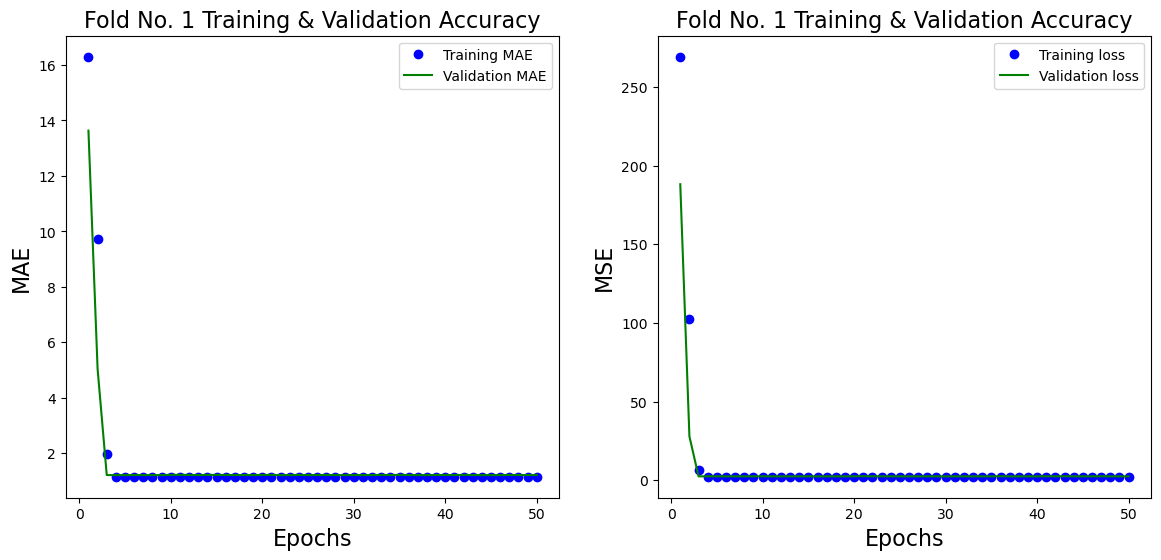

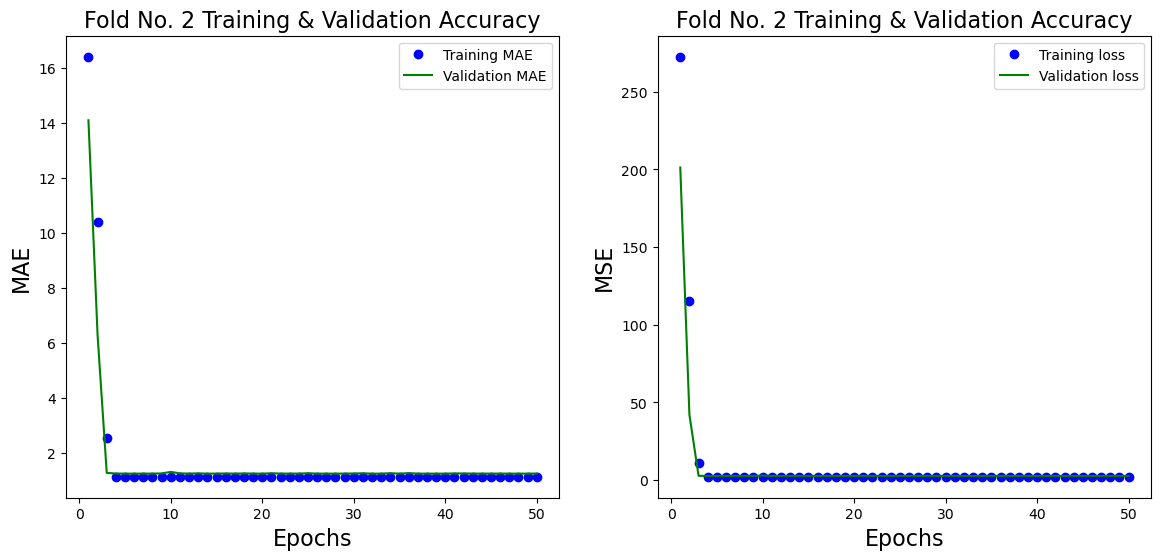

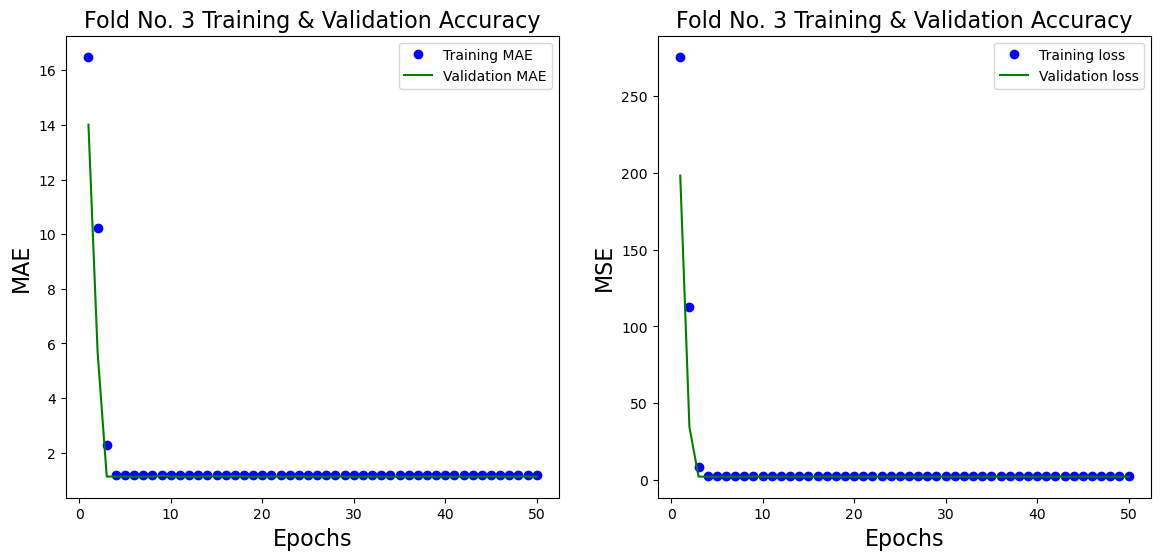

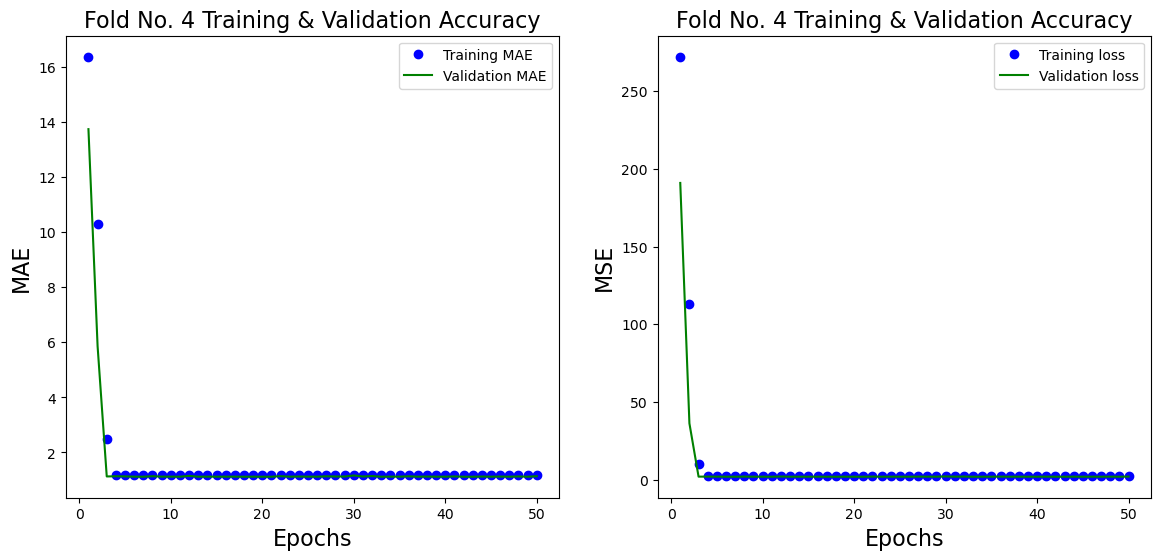

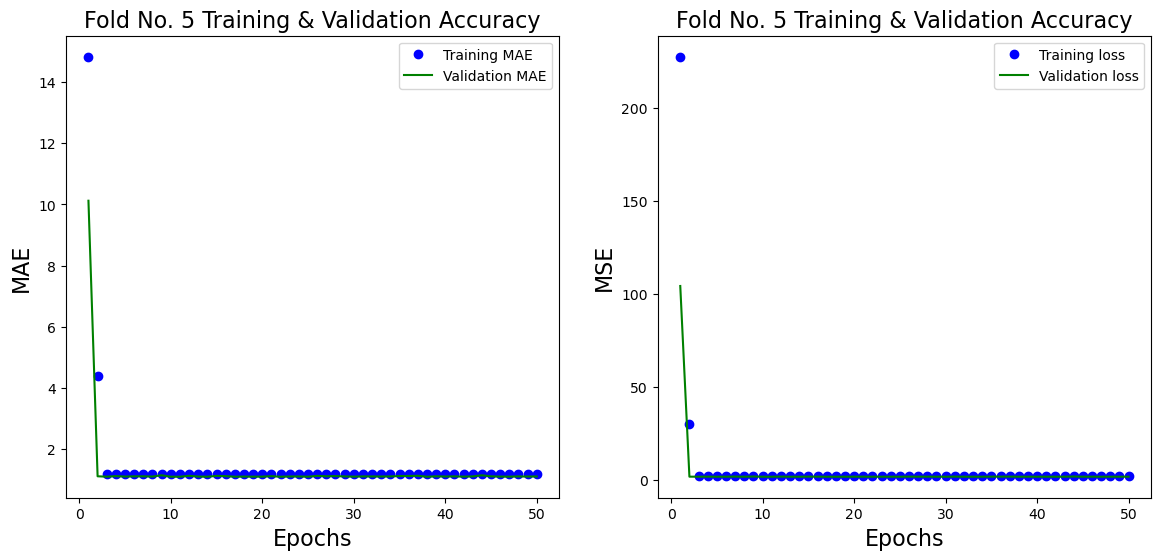

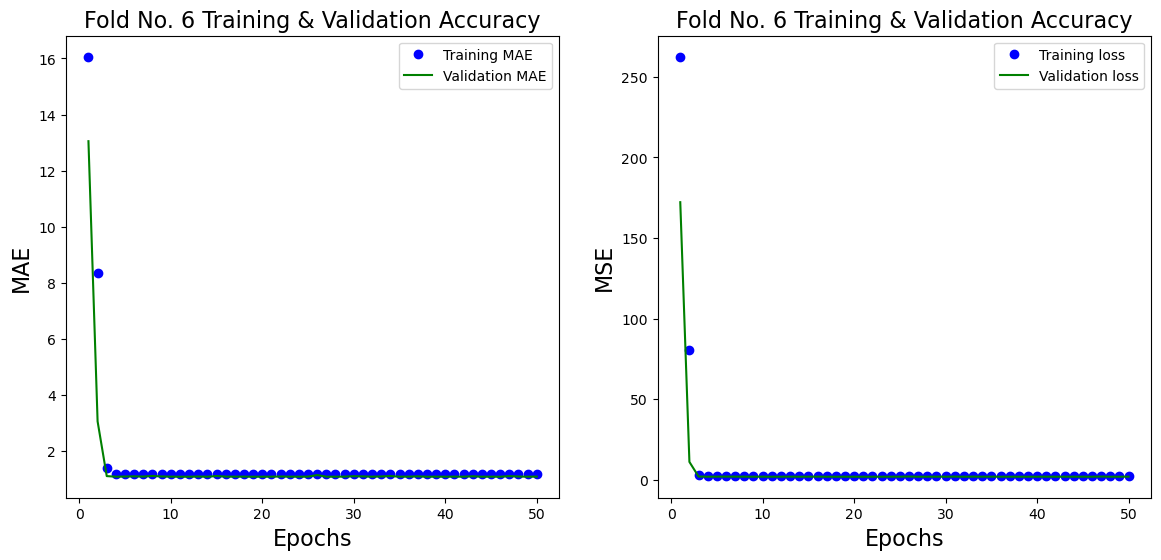

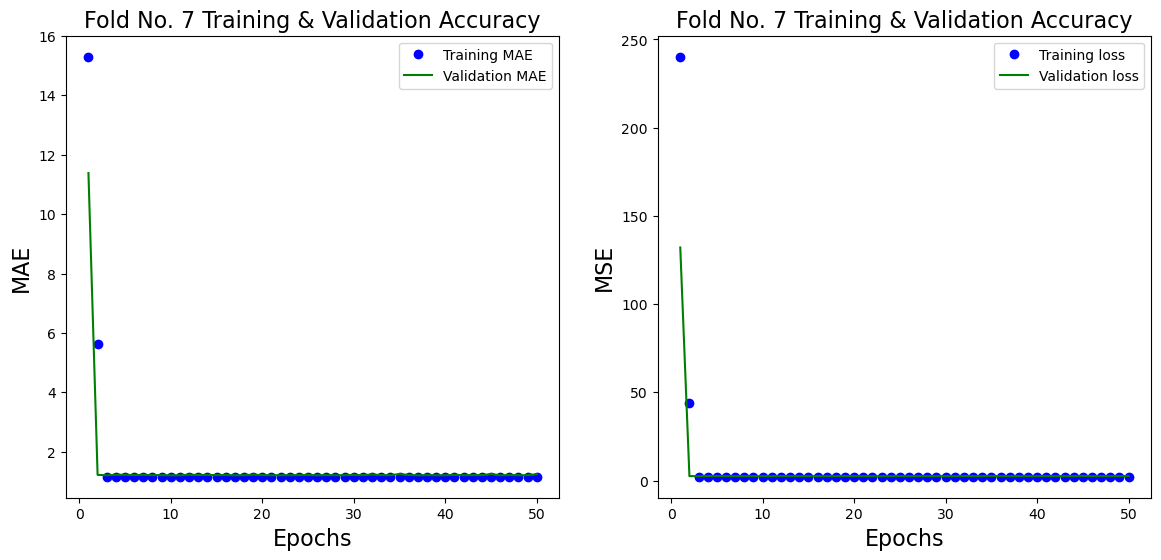

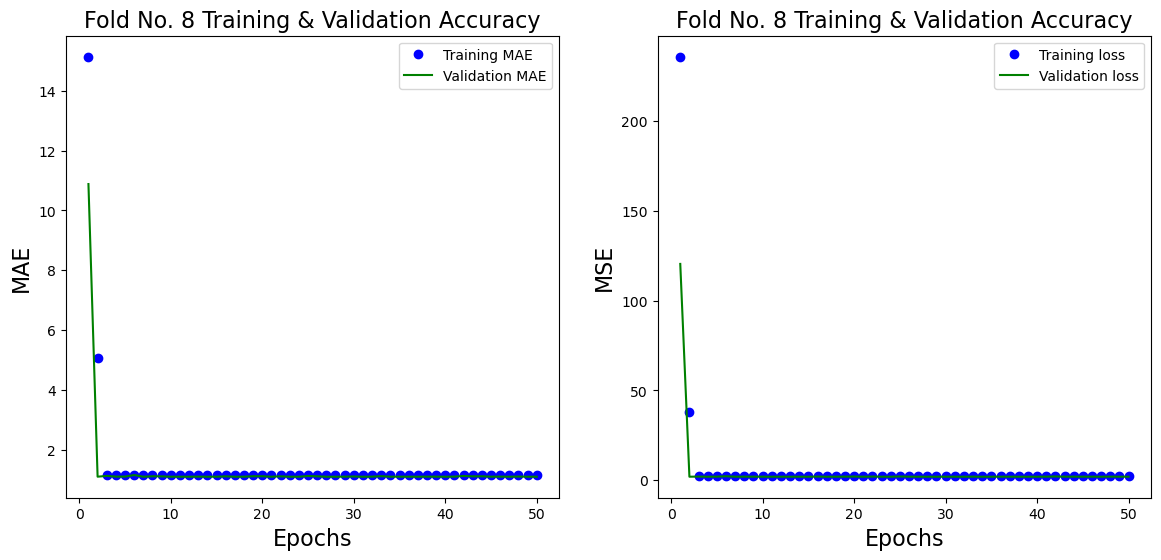

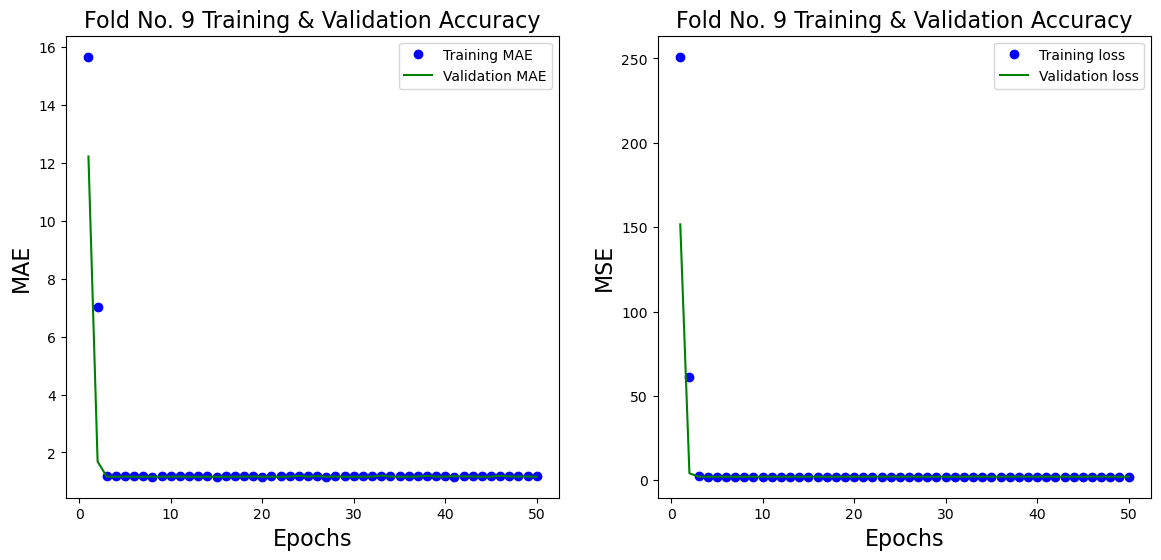

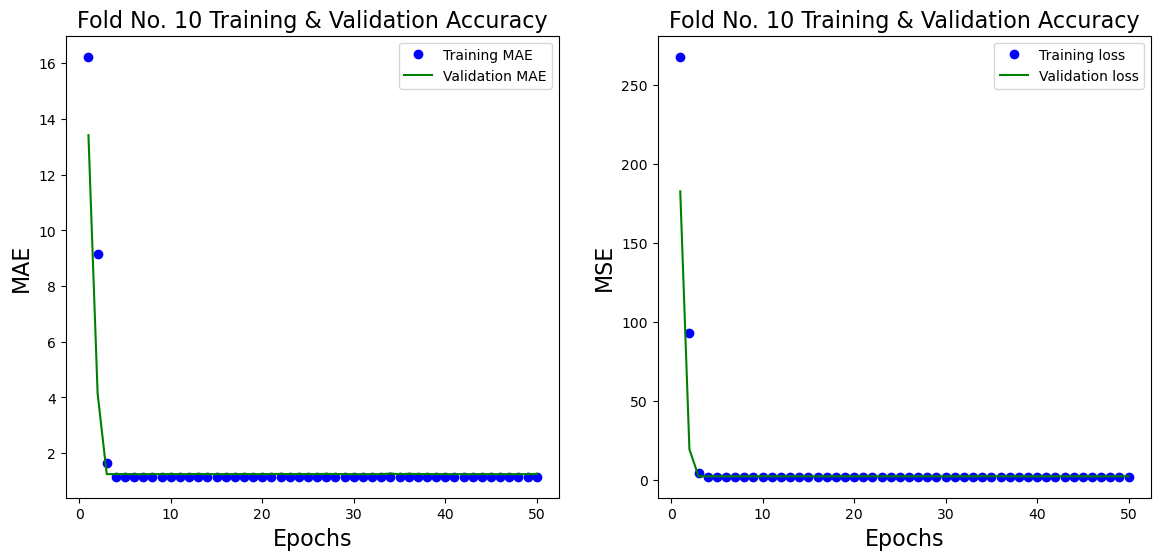

In [9]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the Keras model
    brix_model = Sequential()
    brix_model.add(Dense(10, input_shape=(X.shape[1],), activation='relu'))
    brix_model.add(Dense(20, activation='relu'))
    brix_model.add(Dense(1))

    # Compile model
    brix_model.compile(optimizer=optimizers.RMSprop(learning_rate=0.003),
                loss='mse',
                metrics=['mae'])


    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit the network
    brix_model_history = brix_model.fit(inputs[train], targets[train],
                        validation_data=(inputs[test], targets[test]),
                        epochs=50,
                        batch_size=20)

    # Generate generalization metrics
    brix_scores = brix_model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {brix_model.metrics_names[0]} of {brix_scores[0]}; {brix_model.metrics_names[1]} of {brix_scores[1]}')
    brix_mae_per_fold.append(brix_scores[1])
    brix_loss_per_fold.append(brix_scores[0])
   
    # Performance Curves
    history_dict = brix_model_history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    accuracy = history_dict['mae']
    val_accuracy = history_dict['val_mae']
 
    epochs = range(1, len(loss_values) + 1)
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    #
    # Plot the model accuracy (MAE) vs Epochs
    #
    ax[0].plot(epochs, accuracy, 'bo', label='Training MAE')
    ax[0].plot(epochs, val_accuracy, 'g', label='Validation MAE')
    #ax[0].set_title('Training & Validation Accuracy', fontsize=16)
    ax[0].set_title('Fold No. %d Training & Validation Accuracy' % fold_no, fontsize=16)
    ax[0].set_xlabel('Epochs', fontsize=16)
    ax[0].set_ylabel('MAE', fontsize=16)
    ax[0].legend()
    #
    # Plot the loss vs Epochs
    #
    ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
    ax[1].plot(epochs, val_loss_values, 'g', label='Validation loss')
    #ax[1].set_title('Training & Validation Loss', fontsize=16)
    ax[1].set_title('Fold No. %d Training & Validation Accuracy' % fold_no, fontsize=16)
    ax[1].set_xlabel('Epochs', fontsize=16)
    ax[1].set_ylabel('MSE', fontsize=16)
    ax[1].legend()
    
    # Increase fold number
    fold_no = fold_no + 1

### Average Scores

In [10]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(brix_mae_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {brix_loss_per_fold[i]} - Mean Absolute Error: {brix_mae_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Mean Absolute Error: {np.mean(brix_mae_per_fold)} (+- {np.std(brix_mae_per_fold)})')
print(f'> Loss: {np.mean(brix_loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 2.427168130874634 - Mean Absolute Error: 1.2219579219818115
------------------------------------------------------------------------
> Fold 2 - Loss: 2.673126459121704 - Mean Absolute Error: 1.2687865495681763
------------------------------------------------------------------------
> Fold 3 - Loss: 2.0289058685302734 - Mean Absolute Error: 1.1204147338867188
------------------------------------------------------------------------
> Fold 4 - Loss: 2.0590293407440186 - Mean Absolute Error: 1.1370790004730225
------------------------------------------------------------------------
> Fold 5 - Loss: 1.9561268091201782 - Mean Absolute Error: 1.1038347482681274
------------------------------------------------------------------------
> Fold 6 - Loss: 2.024423599243164 - Mean Absolute Error: 1.082980990409851
----------

### Final Training and Save Keras model to Disk

In [11]:
# Define the Keras model
brix_model = Sequential()
brix_model.add(Dense(10, input_shape=(X.shape[1],), activation='relu'))
brix_model.add(Dense(20, activation='relu'))
brix_model.add(Dense(1))

# Compile model
brix_model.compile(optimizer=optimizers.RMSprop(learning_rate=0.003),
                loss='mse',
                metrics=['mae'])


# Fit the network
brix_model_history = brix_model.fit(standardized_data, y,
                        validation_data=(X_test, y_test),
                        epochs=50,
                        batch_size=20)

pickle.dump(brix_model, open(r'.\Models\GT_brix_model.pkl', 'wb'))

Epoch 1/50
195/195 [==============================] - 1s 2ms/step - loss: 265.2738 - mae: 16.1546 - val_loss: 177.9293 - val_mae: 13.2608
Epoch 2/50
195/195 [==============================] - 0s 1ms/step - loss: 85.0253 - mae: 8.6308 - val_loss: 13.6722 - val_mae: 3.4273
Epoch 3/50
195/195 [==============================] - 0s 1ms/step - loss: 3.4212 - mae: 1.4378 - val_loss: 2.1298 - val_mae: 1.1475
Epoch 4/50
195/195 [==============================] - 0s 1ms/step - loss: 2.2210 - mae: 1.1657 - val_loss: 2.0993 - val_mae: 1.1396
Epoch 5/50
195/195 [==============================] - 0s 1ms/step - loss: 2.2253 - mae: 1.1662 - val_loss: 2.0922 - val_mae: 1.1370
Epoch 6/50
195/195 [==============================] - 0s 1ms/step - loss: 2.2175 - mae: 1.1630 - val_loss: 2.1034 - val_mae: 1.1407
Epoch 7/50
195/195 [==============================] - 0s 1ms/step - loss: 2.2253 - mae: 1.1678 - val_loss: 2.0807 - val_mae: 1.1341
Epoch 8/50
195/195 [==============================] - 0s 1ms/step - 

## Pol Model

### Target "Pol", Train / Test Split and Cross Validation

In [12]:
y = final_df['Pol']
X_train, X_test, y_train, y_test = train_test_split(standardized_data, y, test_size=0.3, random_state=42)

# Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

num_folds = 10

# Define per-fold score containers
pol_mae_per_fold = []
pol_loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

### Keras Neural Network Design for Regression

- The neural network will consist of dense layers or fully connected layers. Fully connected layers are those in which each of the nodes of one layer is connected to every other nodes in the next layer.
- First hidden layer will be configured with input_shape having same value as number of input features.
- The final layer would not need to have activation function set as the expected output or prediction needs to be a continuous numerical value.
- The final layer would need to have just one node.

The neural network would need to be configured with an optimizer function, loss function and an accuracy metric. For the regression problem, the loss function is set to be the **mean squared error (mse)** function which is nothing but the square of the difference between the predictions and the targets. The accuracy metric will be **mean absolute error (mae)** which is noting but the absolute value of the difference between the predictions and the targets.

For the optimization algorithm, we use RMSprop.

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
176/176 [==============================] - 1s 2ms/step - loss: 132.1540 - mae: 10.8665 - val_loss: 17.0720 - val_mae: 3.8486
Epoch 2/50
176/176 [==============================] - 0s 1ms/step - loss: 3.6145 - mae: 1.4628 - val_loss: 2.3450 - val_mae: 1.1971
Epoch 3/50
176/176 [==============================] - 0s 1ms/step - loss: 2.2522 - mae: 1.1871 - val_loss: 2.3240 - val_mae: 1.1880
Epoch 4/50
176/176 [==============================] - 0s 1ms/step - loss: 2.2544 - mae: 1.1838 - val_loss: 2.3234 - val_mae: 1.1879
Epoch 5/50
176/176 [==============================] - 0s 1ms/step - loss: 2.2553 - mae: 1.1841 - val_loss: 2.3597 - val_mae: 1.2023
Epoch 6/50
176/176 [==============================] - 0s 1ms/step - loss: 2.2531 - mae: 1.1836 - val_loss: 2.3589 - val_mae: 1.1942
Epoch 7/50
176/176 [==============================] - 0s 1ms/step - loss: 2.2581 - mae: 1.1834 - val_loss: 

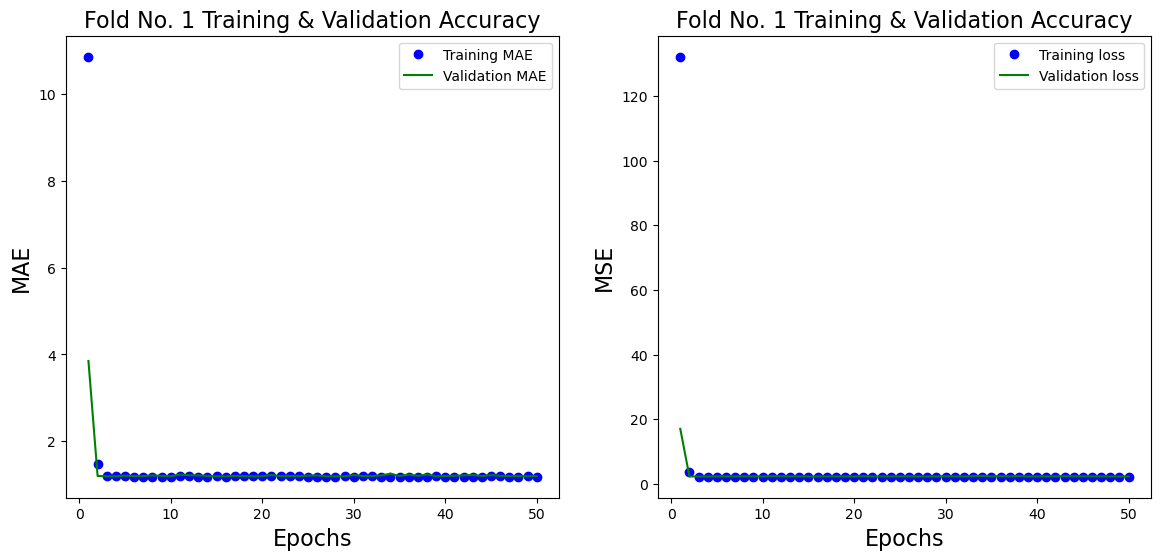

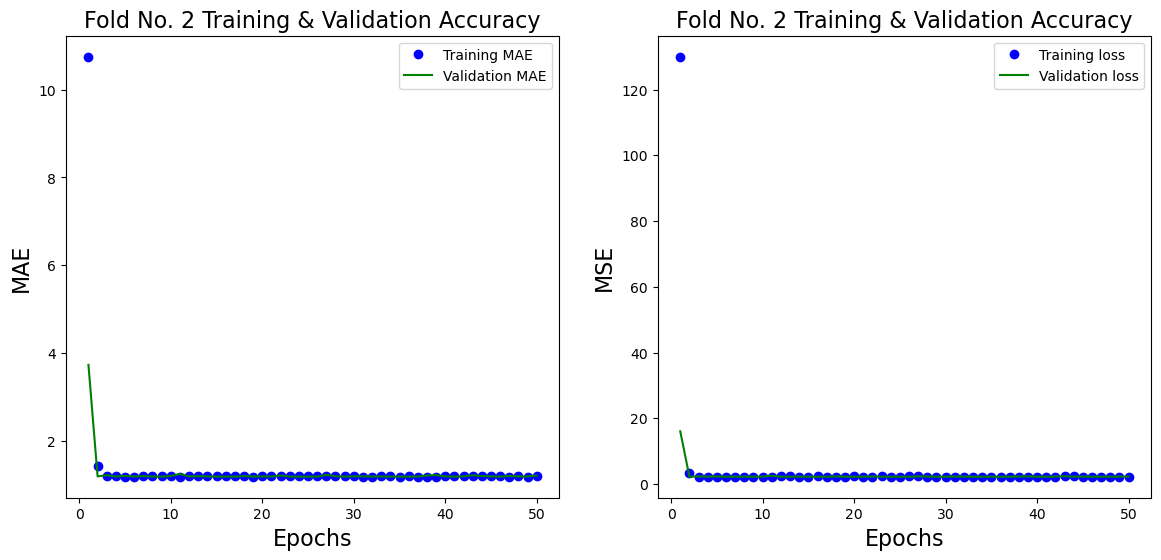

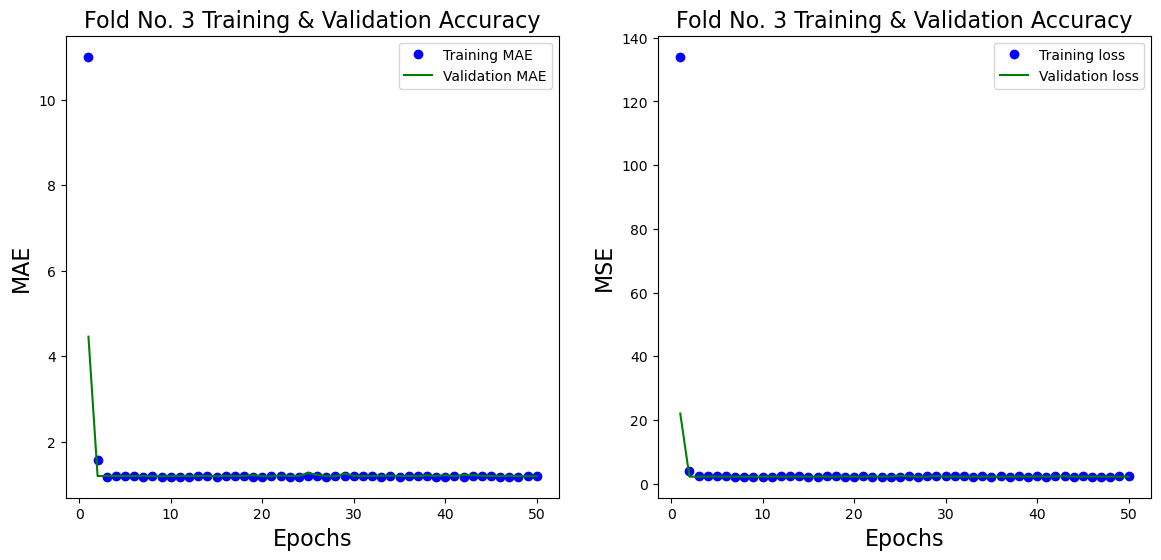

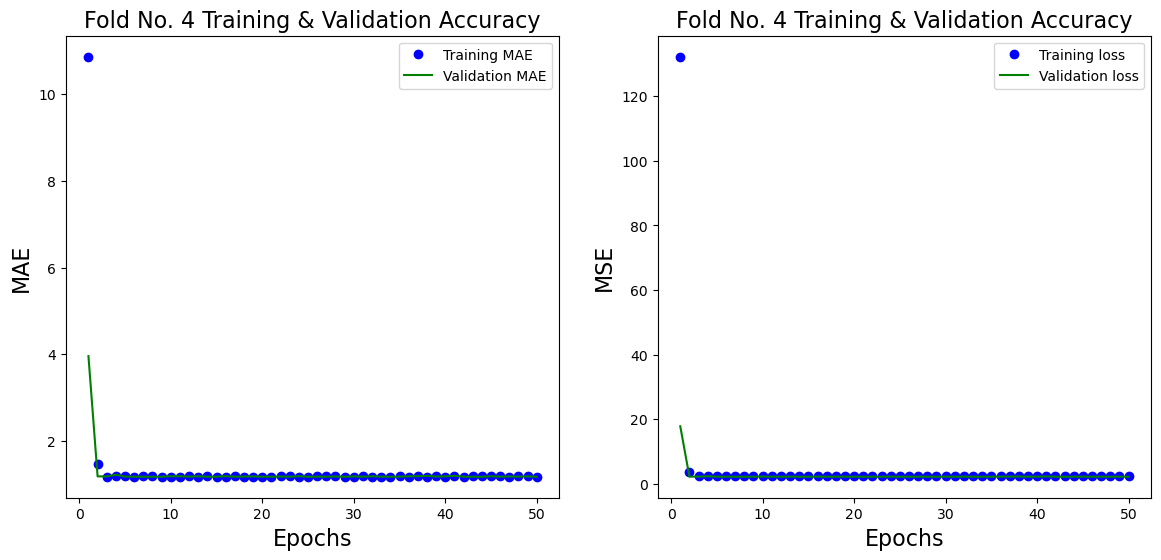

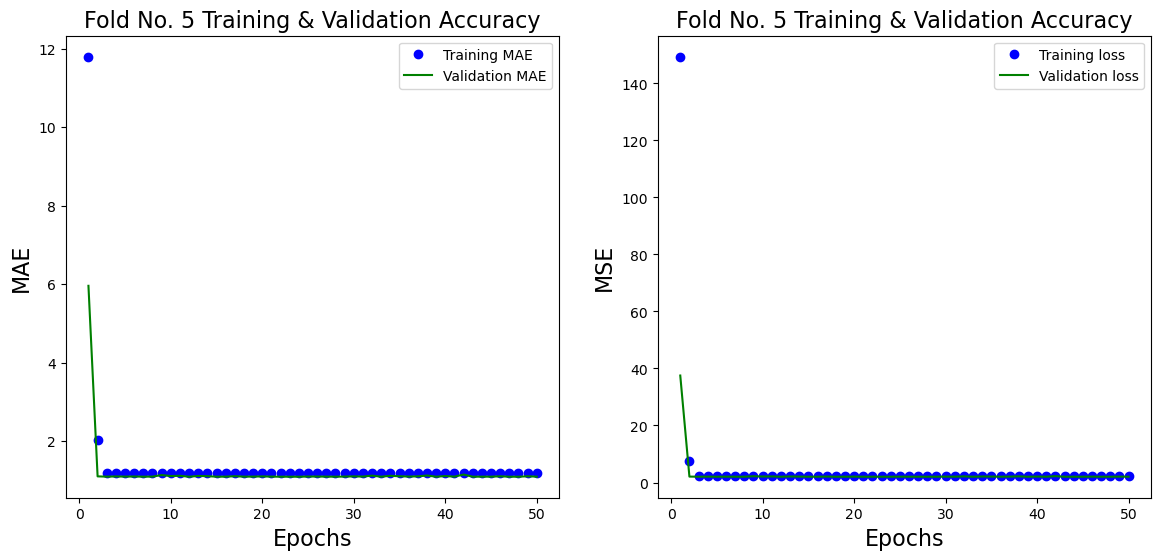

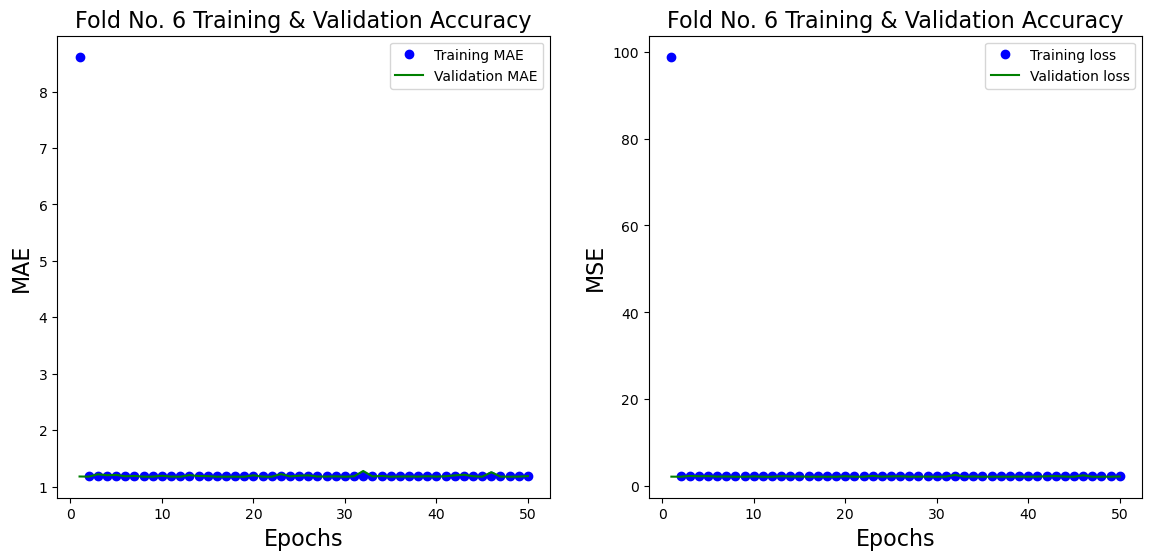

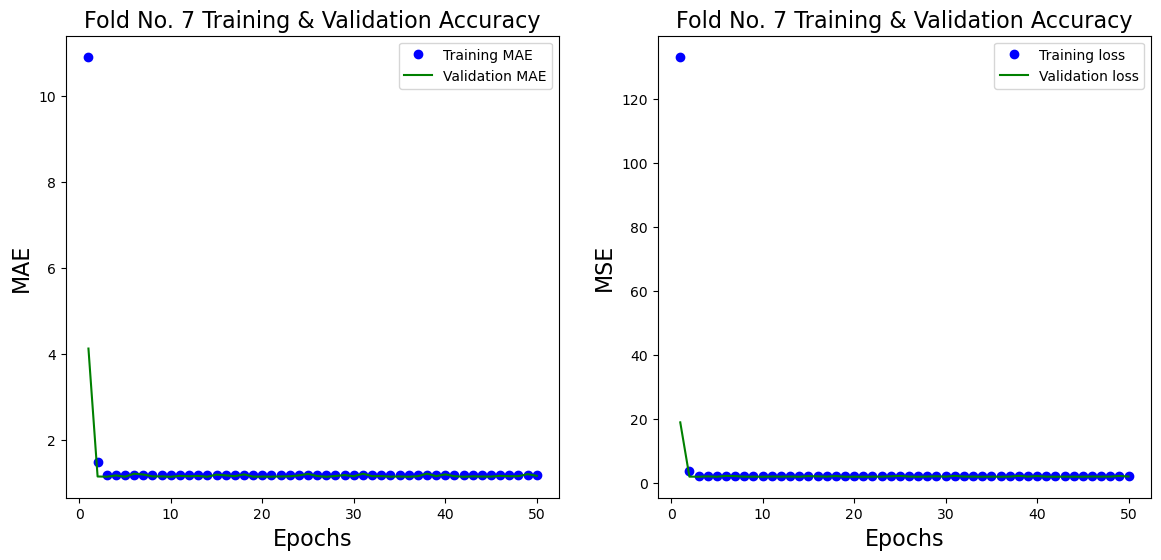

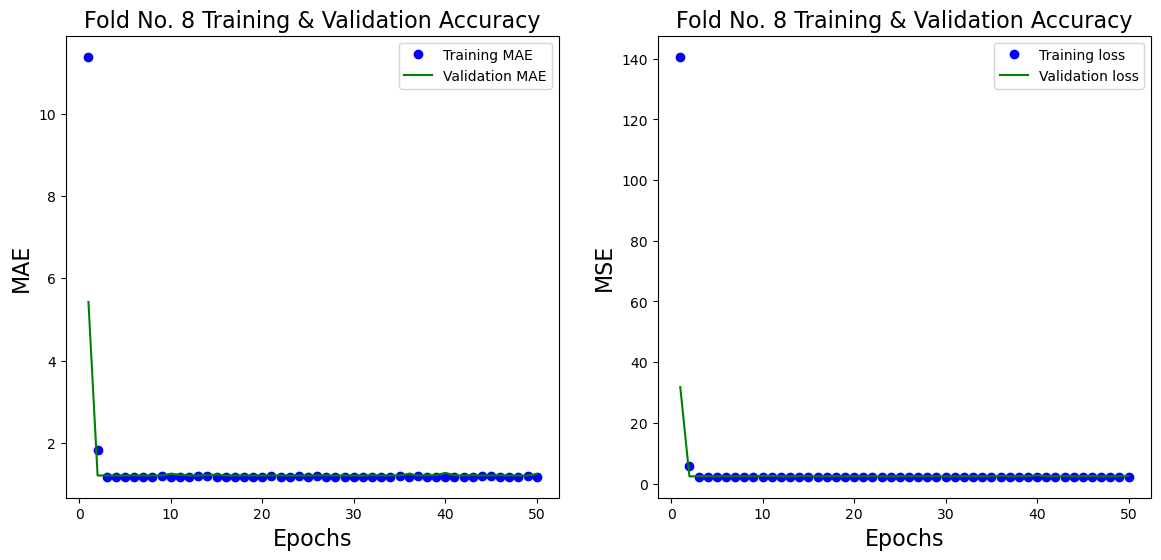

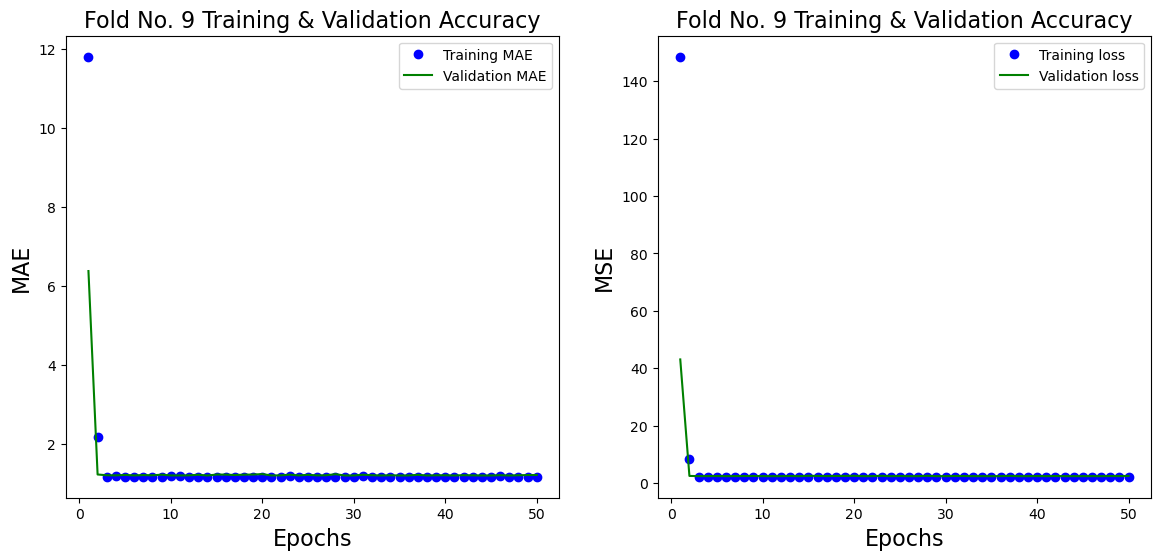

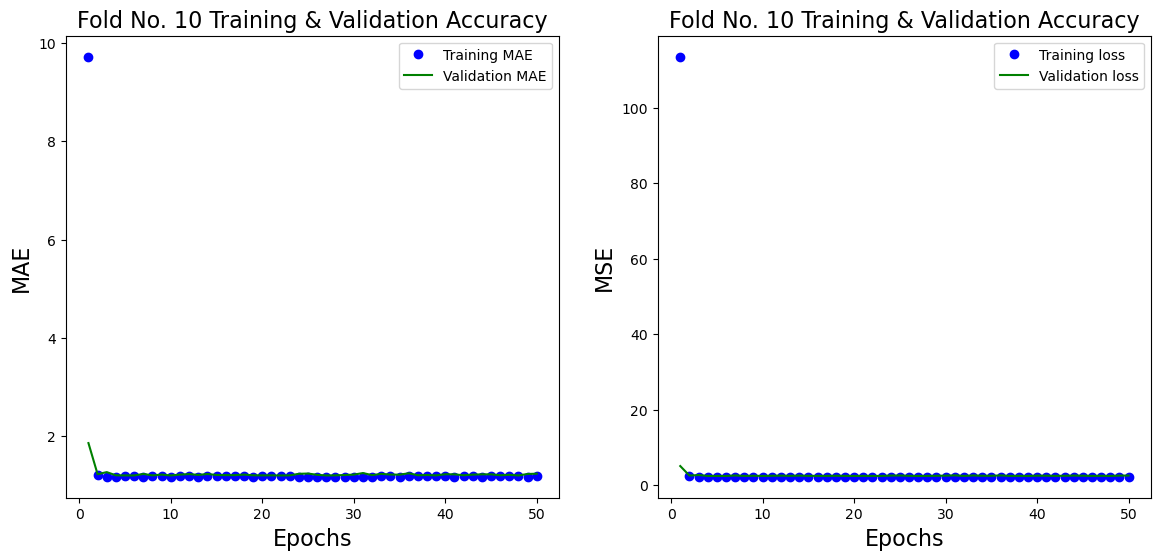

In [13]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the Keras model
    pol_model = Sequential()
    pol_model.add(Dense(10, input_shape=(X.shape[1],), activation='relu'))
    pol_model.add(Dense(20, activation='relu'))
    pol_model.add(Dense(1))

    # Compile model
    pol_model.compile(optimizer=optimizers.RMSprop(learning_rate=0.005),
                loss='mse',
                metrics=['mae'])


    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit the network
    pol_model_history = pol_model.fit(inputs[train], targets[train],
                        validation_data=(inputs[test], targets[test]),
                        epochs=50,
                        batch_size=20)

    # Generate generalization metrics
    pol_scores = pol_model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {pol_model.metrics_names[0]} of {pol_scores[0]}; {pol_model.metrics_names[1]} of {pol_scores[1]}')
    pol_mae_per_fold.append(pol_scores[1])
    pol_loss_per_fold.append(pol_scores[0])
   
    # Performance Curves
    history_dict = pol_model_history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    accuracy = history_dict['mae']
    val_accuracy = history_dict['val_mae']
 
    epochs = range(1, len(loss_values) + 1)
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    #
    # Plot the model accuracy (MAE) vs Epochs
    #
    ax[0].plot(epochs, accuracy, 'bo', label='Training MAE')
    ax[0].plot(epochs, val_accuracy, 'g', label='Validation MAE')
    ax[0].set_title('Fold No. %d Training & Validation Accuracy' % fold_no, fontsize=16)
    ax[0].set_xlabel('Epochs', fontsize=16)
    ax[0].set_ylabel('MAE', fontsize=16)
    ax[0].legend()
    #
    # Plot the loss vs Epochs
    #
    ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
    ax[1].plot(epochs, val_loss_values, 'g', label='Validation loss')
    ax[1].set_title('Fold No. %d Training & Validation Accuracy' % fold_no, fontsize=16)
    ax[1].set_xlabel('Epochs', fontsize=16)
    ax[1].set_ylabel('MSE', fontsize=16)
    ax[1].legend()
    
    # Increase fold number
    fold_no = fold_no + 1

### Average Scores

In [14]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(pol_mae_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {pol_loss_per_fold[i]} - Mean Absolute Error: {pol_mae_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Mean Absolute Error: {np.mean(pol_mae_per_fold)} (+- {np.std(pol_mae_per_fold)})')
print(f'> Loss: {np.mean(pol_loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 2.336423873901367 - Mean Absolute Error: 1.1938352584838867
------------------------------------------------------------------------
> Fold 2 - Loss: 2.26473331451416 - Mean Absolute Error: 1.2045056819915771
------------------------------------------------------------------------
> Fold 3 - Loss: 2.21480131149292 - Mean Absolute Error: 1.1901062726974487
------------------------------------------------------------------------
> Fold 4 - Loss: 2.1803295612335205 - Mean Absolute Error: 1.1801084280014038
------------------------------------------------------------------------
> Fold 5 - Loss: 2.033228874206543 - Mean Absolute Error: 1.0971983671188354
------------------------------------------------------------------------
> Fold 6 - Loss: 2.2336196899414062 - Mean Absolute Error: 1.1862170696258545
------------

### Final Training and Save Keras model to Disk

In [15]:
# Define the Keras model
pol_model = Sequential()
pol_model.add(Dense(10, input_shape=(X.shape[1],), activation='relu'))
pol_model.add(Dense(20, activation='relu'))
pol_model.add(Dense(1))

# Compile model
pol_model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                loss='mse',
                metrics=['mae'])


# Fit the network
pol_model_history = pol_model.fit(standardized_data, y,
                        validation_data=(X_test, y_test),
                        epochs=50,
                        batch_size=20)
    
pickle.dump(pol_model, open(r'.\Models\GT_pol_model.pkl', 'wb'))

Epoch 1/50
195/195 [==============================] - 1s 2ms/step - loss: 230.7328 - mae: 15.1125 - val_loss: 213.5629 - val_mae: 14.5412
Epoch 2/50
195/195 [==============================] - 0s 1ms/step - loss: 188.2168 - mae: 13.6262 - val_loss: 162.6563 - val_mae: 12.6704
Epoch 3/50
195/195 [==============================] - 0s 1ms/step - loss: 132.3251 - mae: 11.3790 - val_loss: 103.0635 - val_mae: 10.0472
Epoch 4/50
195/195 [==============================] - 0s 1ms/step - loss: 73.6195 - mae: 8.3927 - val_loss: 47.0017 - val_mae: 6.6996
Epoch 5/50
195/195 [==============================] - 0s 1ms/step - loss: 25.7908 - mae: 4.7254 - val_loss: 9.5114 - val_mae: 2.7625
Epoch 6/50
195/195 [==============================] - 0s 1ms/step - loss: 3.8075 - mae: 1.5470 - val_loss: 2.1244 - val_mae: 1.1562
Epoch 7/50
195/195 [==============================] - 0s 1ms/step - loss: 2.2451 - mae: 1.1796 - val_loss: 2.1194 - val_mae: 1.1549
Epoch 8/50
195/195 [==============================] - 0

## Purity Model

### Target "Purity", Train / Test Split and Cross Validation

In [16]:
y = final_df['Pureza']
X_train, X_test, y_train, y_test = train_test_split(standardized_data, y, test_size=0.3, random_state=42)

# Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

num_folds = 10

# Define per-fold score containers
purity_mae_per_fold = []
purity_loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

### Keras Neural Network Design for Regression

- The neural network will consist of dense layers or fully connected layers. Fully connected layers are those in which each of the nodes of one layer is connected to every other nodes in the next layer.
- First hidden layer will be configured with input_shape having same value as number of input features.
- The final layer would not need to have activation function set as the expected output or prediction needs to be a continuous numerical value.
- The final layer would need to have just one node.

The neural network would need to be configured with an optimizer function, loss function and an accuracy metric. For the regression problem, the loss function is set to be the **mean squared error (mse)** function which is nothing but the square of the difference between the predictions and the targets. The accuracy metric will be **mean absolute error (mae)** which is noting but the absolute value of the difference between the predictions and the targets.

For the optimization algorithm, we use RMSprop.

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
176/176 [==============================] - 1s 2ms/step - loss: 7083.6147 - mae: 84.1300 - val_loss: 6735.6167 - val_mae: 82.0479
Epoch 2/50
176/176 [==============================] - 0s 1ms/step - loss: 6215.3218 - mae: 78.7815 - val_loss: 5633.7954 - val_mae: 75.0335
Epoch 3/50
176/176 [==============================] - 0s 1ms/step - loss: 4936.0415 - mae: 70.1620 - val_loss: 4201.6577 - val_mae: 64.7911
Epoch 4/50
176/176 [==============================] - 0s 1ms/step - loss: 3423.7874 - mae: 58.3482 - val_loss: 2645.0161 - val_mae: 51.3931
Epoch 5/50
176/176 [==============================] - 0s 1ms/step - loss: 1912.7577 - mae: 43.4267 - val_loss: 1225.4077 - val_mae: 34.9520
Epoch 6/50
176/176 [==============================] - 0s 1ms/step - loss: 690.0196 - mae: 25.5937 - val_loss: 253.8927 - val_mae: 15.8154
Epoch 7/50
176/176 [==============================] - 0s 1ms/step

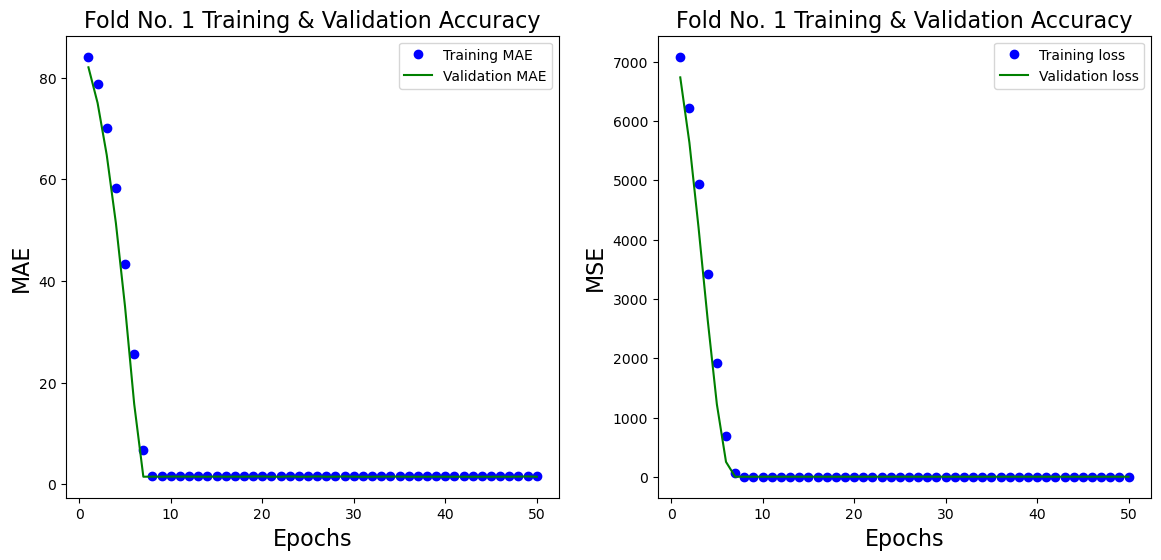

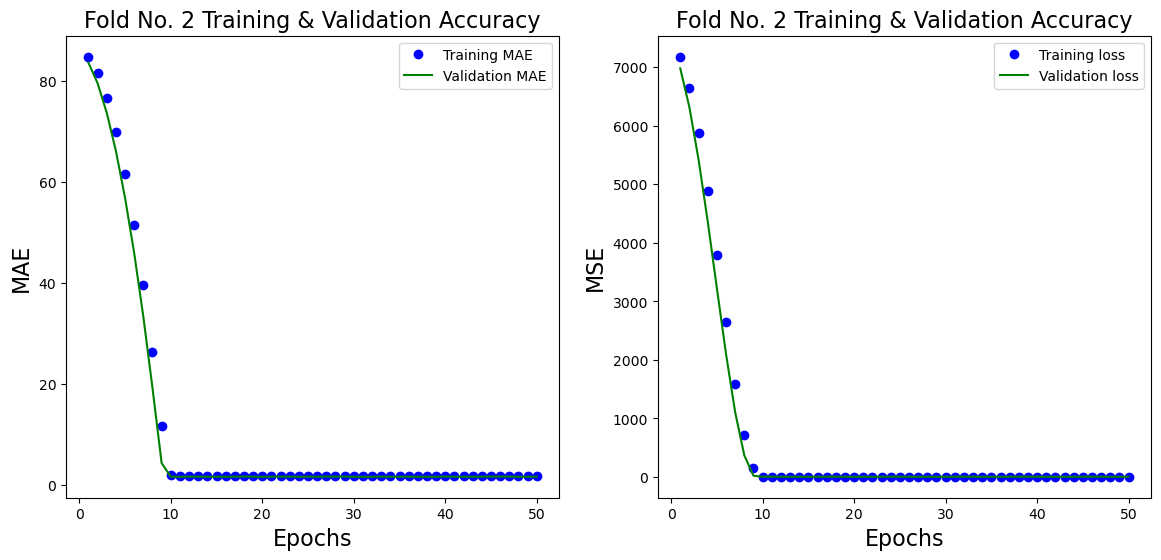

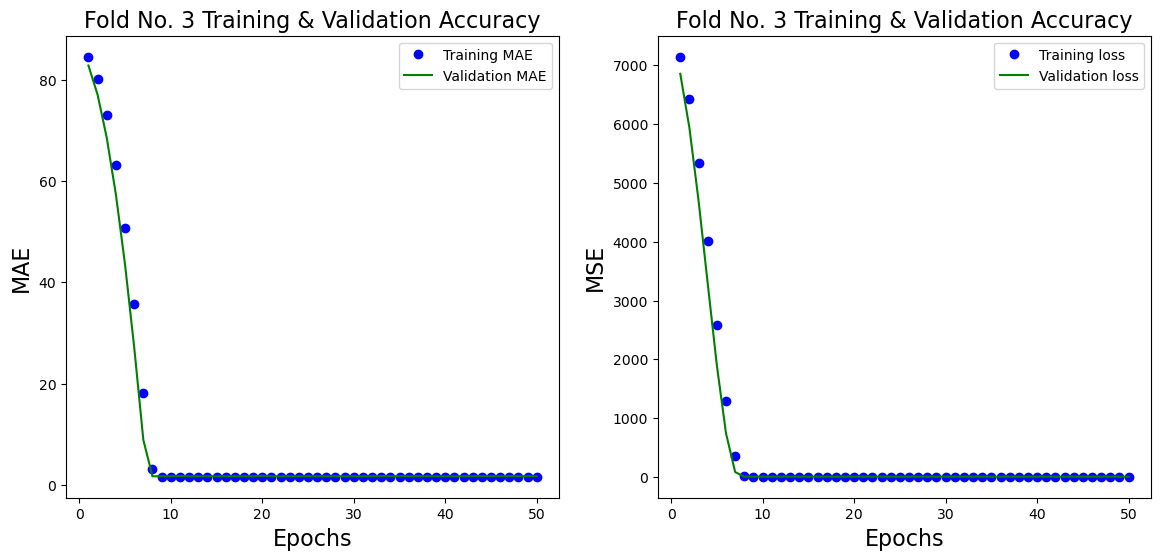

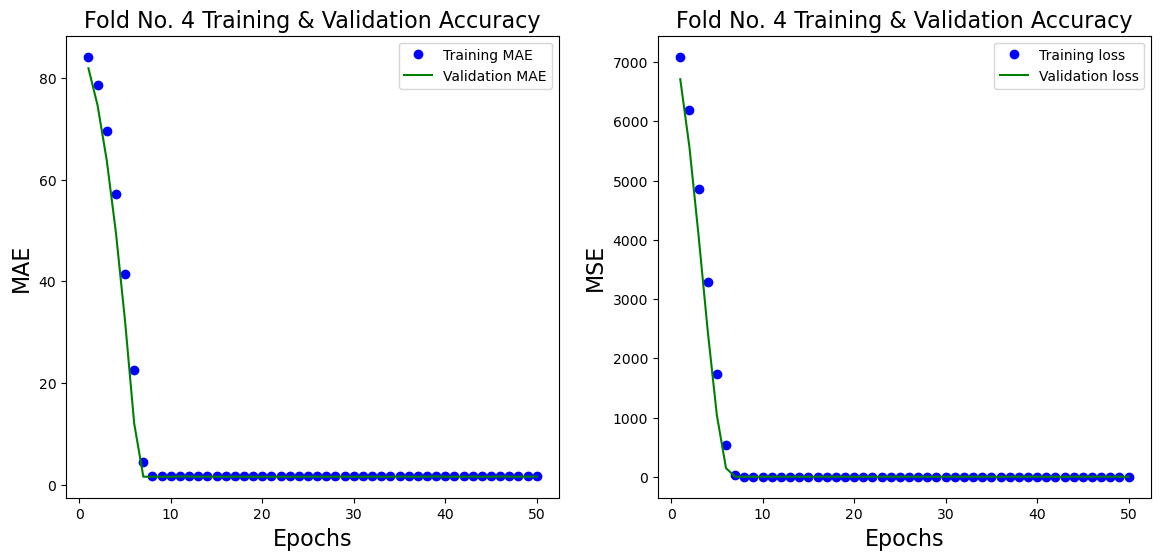

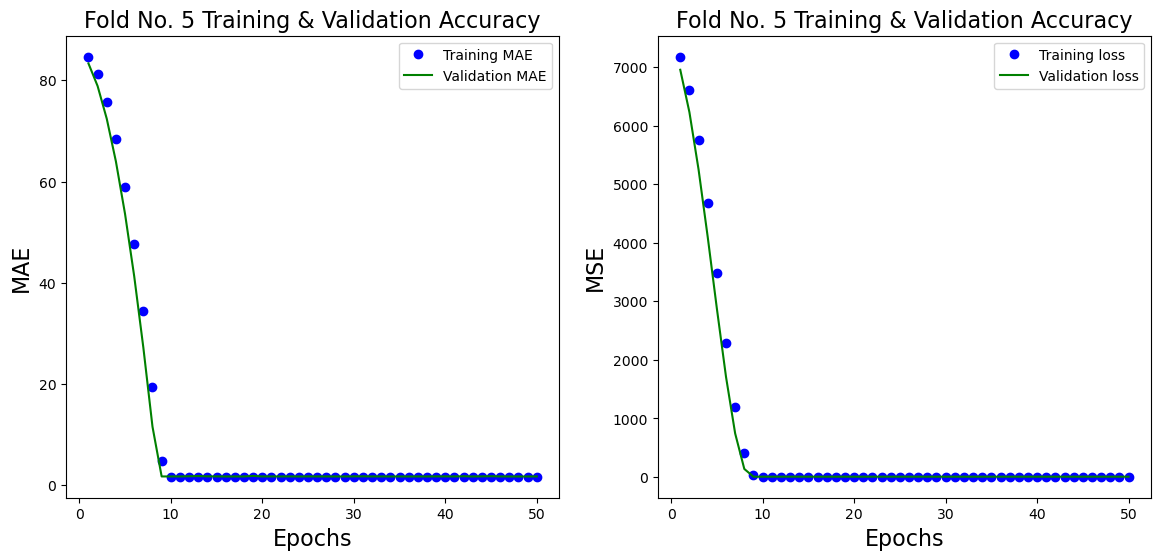

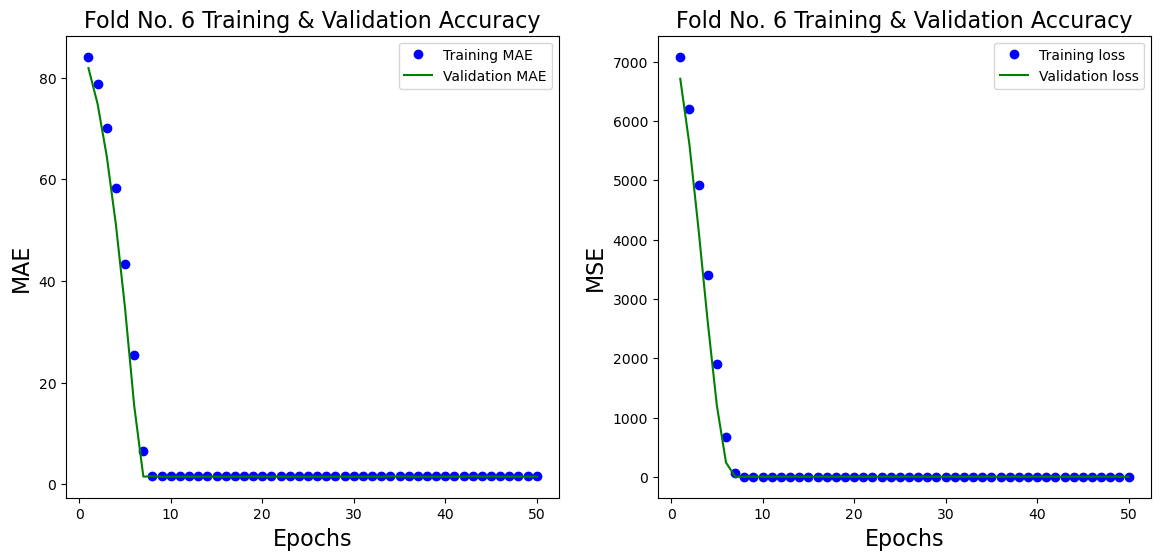

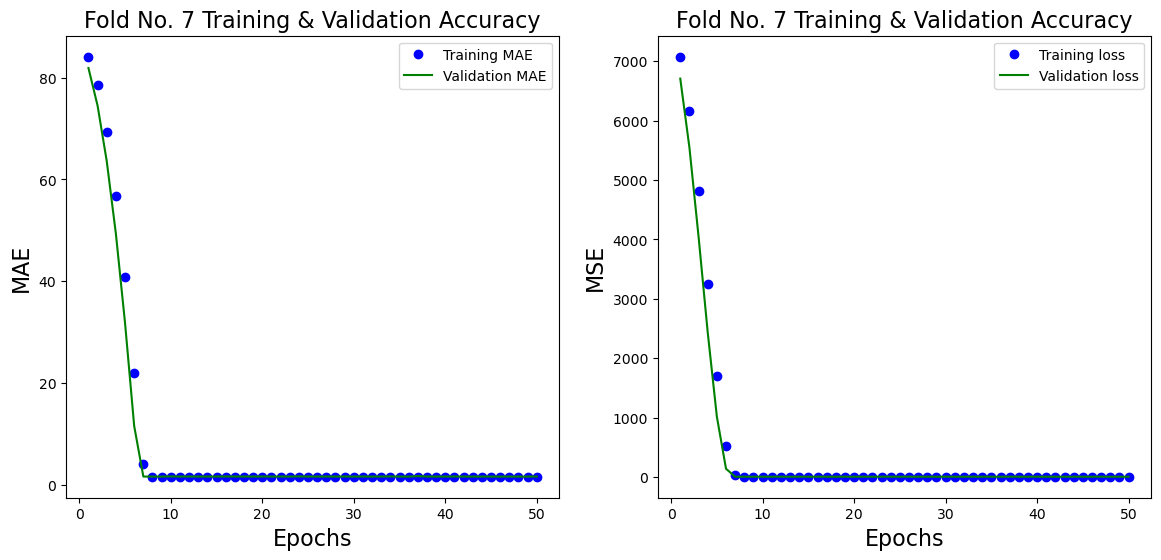

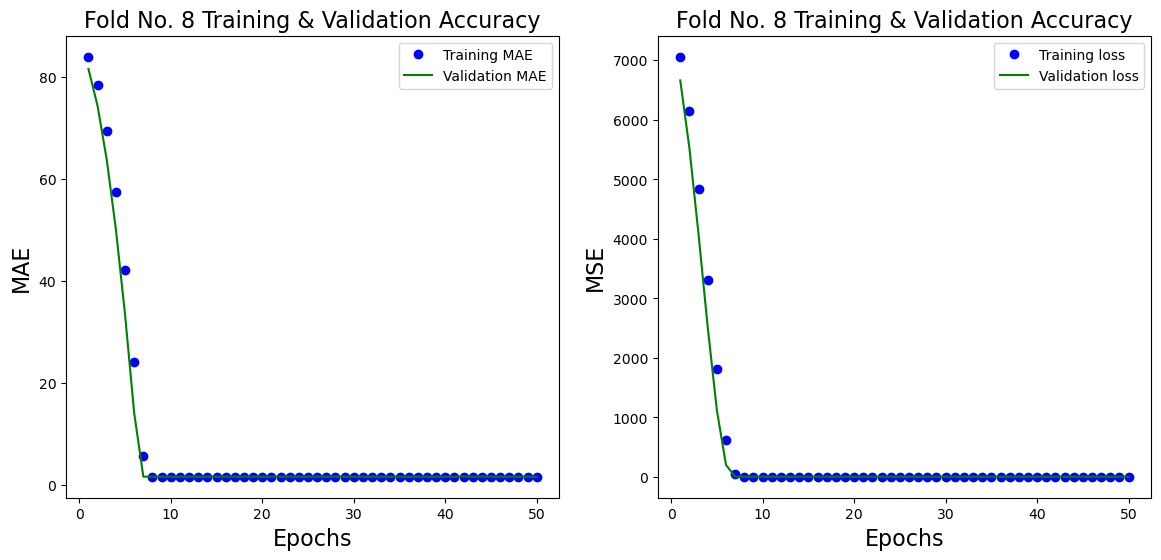

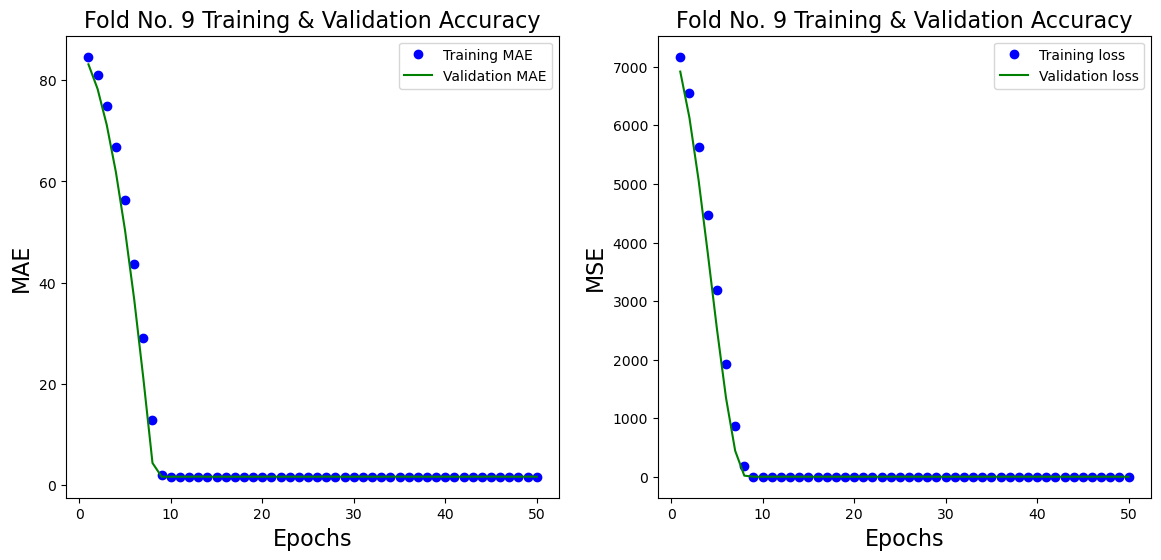

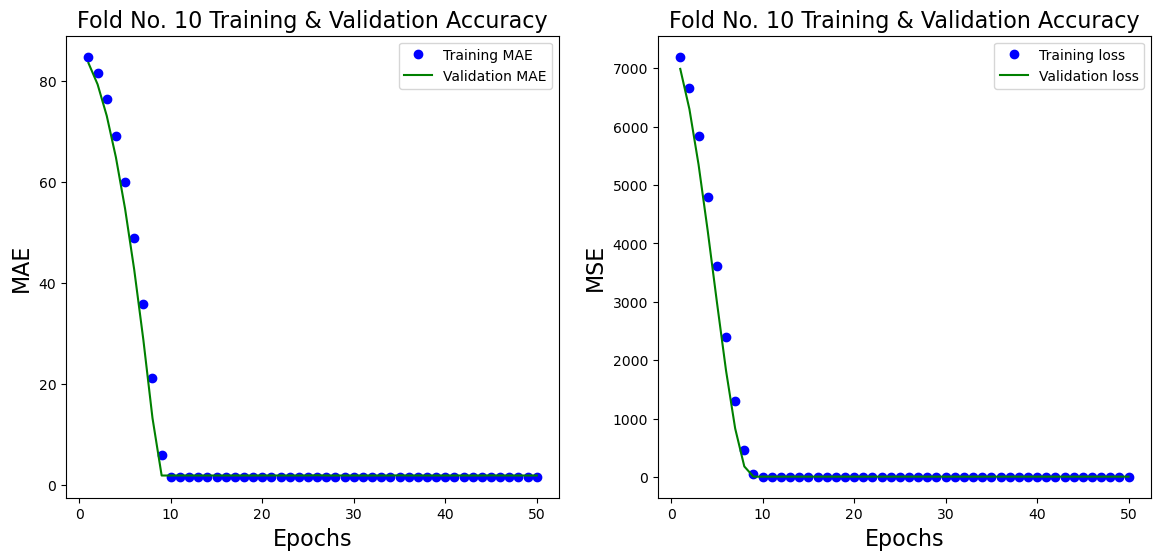

In [17]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the Keras model
    purity_model = Sequential()
    purity_model.add(Dense(10, input_shape=(X.shape[1],), activation='relu'))
    purity_model.add(Dense(20, activation='relu'))
    purity_model.add(Dense(1))

    # Compile model
    purity_model.compile(optimizer=optimizers.RMSprop(learning_rate=0.002),
                loss='mse',
                metrics=['mae'])


    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit the network
    purity_model_history = purity_model.fit(inputs[train], targets[train],
                        validation_data=(inputs[test], targets[test]),
                        epochs=50,
                        batch_size=20)

    # Generate generalization metrics
    purity_scores = purity_model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {purity_model.metrics_names[0]} of {purity_scores[0]}; {purity_model.metrics_names[1]} of {purity_scores[1]}')
    purity_mae_per_fold.append(purity_scores[1])
    purity_loss_per_fold.append(purity_scores[0])
   
    # Performance Curves
    history_dict = purity_model_history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    accuracy = history_dict['mae']
    val_accuracy = history_dict['val_mae']
 
    epochs = range(1, len(loss_values) + 1)
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    #
    # Plot the model accuracy (MAE) vs Epochs
    #
    ax[0].plot(epochs, accuracy, 'bo', label='Training MAE')
    ax[0].plot(epochs, val_accuracy, 'g', label='Validation MAE')
    ax[0].set_title('Fold No. %d Training & Validation Accuracy' % fold_no, fontsize=16)
    ax[0].set_xlabel('Epochs', fontsize=16)
    ax[0].set_ylabel('MAE', fontsize=16)
    ax[0].legend()
    #
    # Plot the loss vs Epochs
    #
    ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
    ax[1].plot(epochs, val_loss_values, 'g', label='Validation loss')
    ax[1].set_title('Fold No. %d Training & Validation Accuracy' % fold_no, fontsize=16)
    ax[1].set_xlabel('Epochs', fontsize=16)
    ax[1].set_ylabel('MSE', fontsize=16)
    ax[1].legend()
    
    # Increase fold number
    fold_no = fold_no + 1

### Average Scores

In [18]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(purity_mae_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {purity_loss_per_fold[i]} - Mean Absolute Error: {purity_mae_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Mean Absolute Error: {np.mean(purity_mae_per_fold)} (+- {np.std(purity_mae_per_fold)})')
print(f'> Loss: {np.mean(purity_loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.7702739238739014 - Mean Absolute Error: 1.5064417123794556
------------------------------------------------------------------------
> Fold 2 - Loss: 4.066264629364014 - Mean Absolute Error: 1.5575706958770752
------------------------------------------------------------------------
> Fold 3 - Loss: 5.194855213165283 - Mean Absolute Error: 1.696134090423584
------------------------------------------------------------------------
> Fold 4 - Loss: 4.155156135559082 - Mean Absolute Error: 1.5829957723617554
------------------------------------------------------------------------
> Fold 5 - Loss: 5.012633800506592 - Mean Absolute Error: 1.6747757196426392
------------------------------------------------------------------------
> Fold 6 - Loss: 3.809321165084839 - Mean Absolute Error: 1.4960857629776
---------------

### Final Training and Save Keras model to Disk

In [19]:
# Define the Keras model
purity_model = Sequential()
purity_model.add(Dense(10, input_shape=(X.shape[1],), activation='relu'))
purity_model.add(Dense(20, activation='relu'))
purity_model.add(Dense(1))

# Compile model
purity_model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                loss='mse',
                metrics=['mae'])

# Fit the network
purity_model_history = purity_model.fit(standardized_data, y,
                        validation_data=(X_test, y_test),
                        epochs=50,
                        batch_size=20)
    
pickle.dump(purity_model, open(r'.\Models\GT_purity_model.pkl', 'wb'))

Epoch 1/50
195/195 [==============================] - 1s 2ms/step - loss: 7268.4390 - mae: 85.2281 - val_loss: 7164.6973 - val_mae: 84.6209
Epoch 2/50
195/195 [==============================] - 0s 1ms/step - loss: 7008.8394 - mae: 83.6899 - val_loss: 6841.2607 - val_mae: 82.6877
Epoch 3/50
195/195 [==============================] - 0s 1ms/step - loss: 6626.5142 - mae: 81.3721 - val_loss: 6401.2344 - val_mae: 79.9827
Epoch 4/50
195/195 [==============================] - 0s 1ms/step - loss: 6134.1084 - mae: 78.2858 - val_loss: 5857.9673 - val_mae: 76.5112
Epoch 5/50
195/195 [==============================] - 0s 1ms/step - loss: 5546.6201 - mae: 74.4352 - val_loss: 5228.1626 - val_mae: 72.2783
Epoch 6/50
195/195 [==============================] - 0s 1ms/step - loss: 4881.8516 - mae: 69.8240 - val_loss: 4531.4160 - val_mae: 67.2860
Epoch 7/50
195/195 [==============================] - 0s 1ms/step - loss: 4161.5850 - mae: 64.4554 - val_loss: 3790.7756 - val_mae: 61.5367
Epoch 8/50
195/195 [

## Yield Model

### Target "Yield", Train / Test Split and Cross Validation

In [20]:
y = final_df['Redimiento']
X_train, X_test, y_train, y_test = train_test_split(standardized_data, y, test_size=0.3, random_state=42)

# Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

num_folds = 10

# Define per-fold score containers
yield_mae_per_fold = []
yield_loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

### Keras Neural Network Design for Regression

- The neural network will consist of dense layers or fully connected layers. Fully connected layers are those in which each of the nodes of one layer is connected to every other nodes in the next layer.
- First hidden layer will be configured with input_shape having same value as number of input features.
- The final layer would not need to have activation function set as the expected output or prediction needs to be a continuous numerical value.
- The final layer would need to have just one node.

The neural network would need to be configured with an optimizer function, loss function and an accuracy metric. For the regression problem, the loss function is set to be the **mean squared error (mse)** function which is nothing but the square of the difference between the predictions and the targets. The accuracy metric will be **mean absolute error (mae)** which is noting but the absolute value of the difference between the predictions and the targets.

For the optimization algorithm, we use RMSprop.

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
176/176 [==============================] - 1s 2ms/step - loss: 11899.1133 - mae: 107.2319 - val_loss: 5895.1235 - val_mae: 75.9001
Epoch 2/50
176/176 [==============================] - 0s 1ms/step - loss: 1724.1885 - mae: 33.4314 - val_loss: 134.8443 - val_mae: 9.1455
Epoch 3/50
176/176 [==============================] - 0s 1ms/step - loss: 159.0741 - mae: 9.8905 - val_loss: 134.6859 - val_mae: 9.1421
Epoch 4/50
176/176 [==============================] - 0s 1ms/step - loss: 159.2284 - mae: 9.8907 - val_loss: 135.3663 - val_mae: 9.1591
Epoch 5/50
176/176 [==============================] - 0s 1ms/step - loss: 158.7636 - mae: 9.8760 - val_loss: 134.3811 - val_mae: 9.1507
Epoch 6/50
176/176 [==============================] - 0s 1ms/step - loss: 159.1342 - mae: 9.8620 - val_loss: 134.3379 - val_mae: 9.1400
Epoch 7/50
176/176 [==============================] - 0s 1ms/step - loss: 159.0

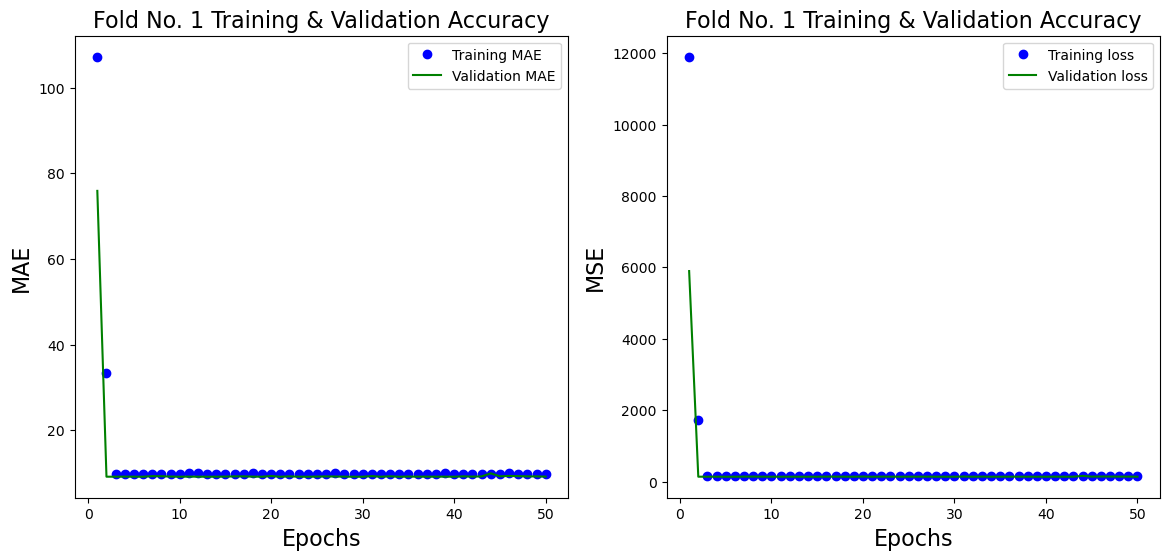

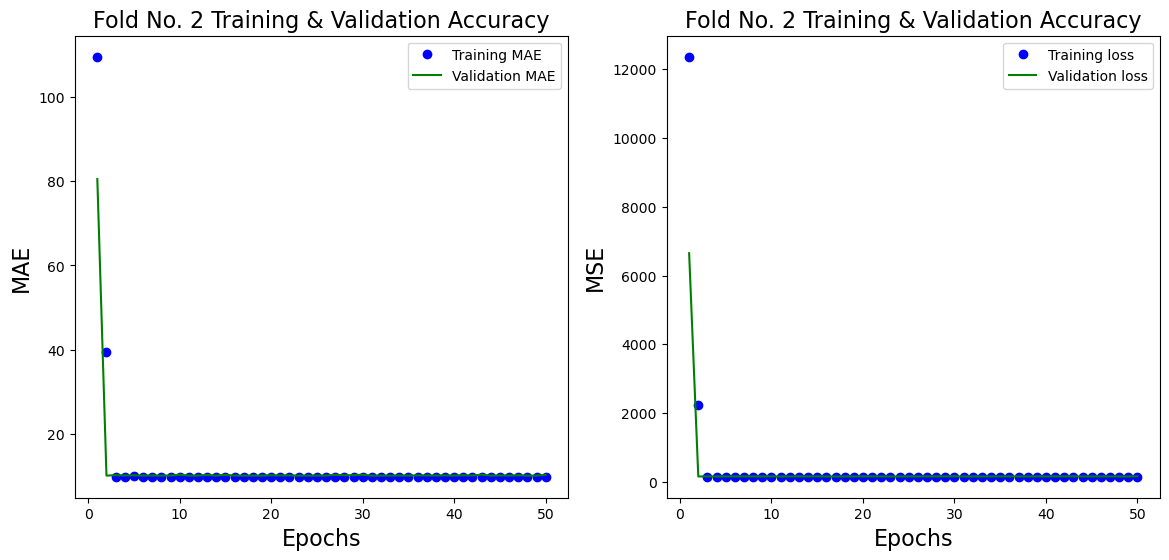

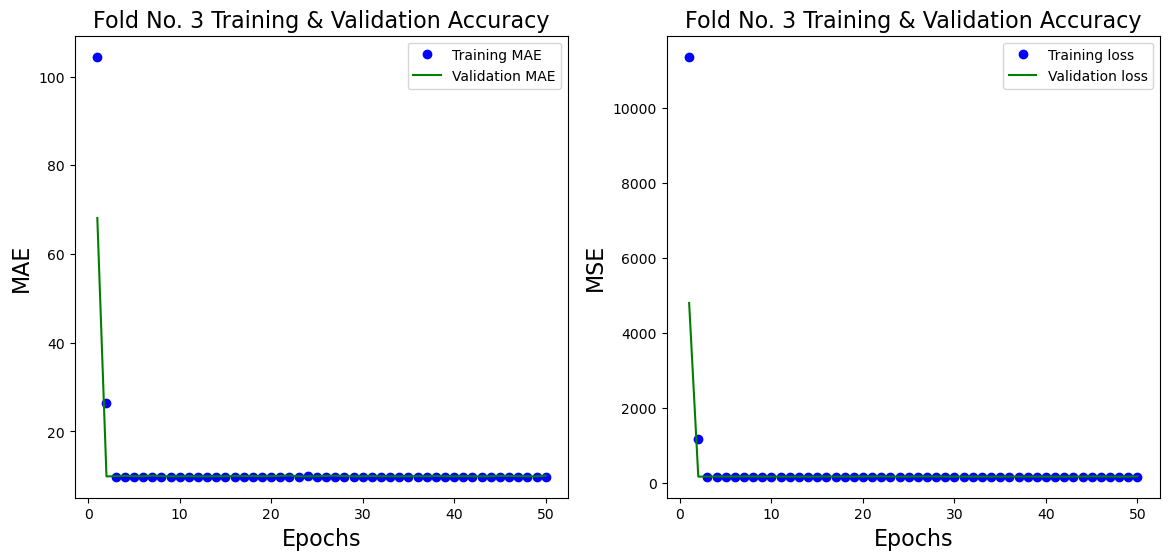

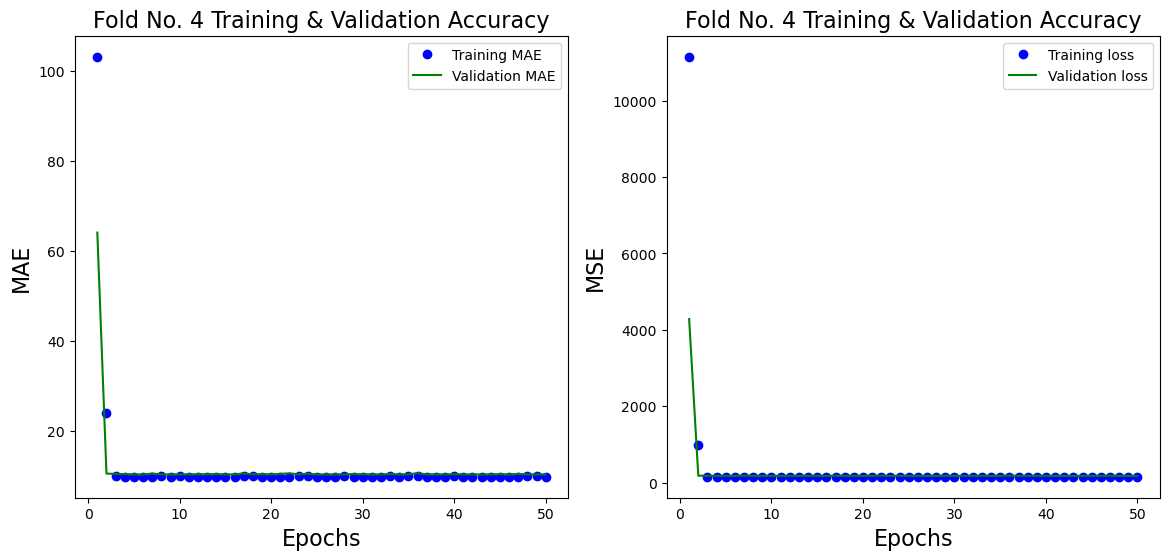

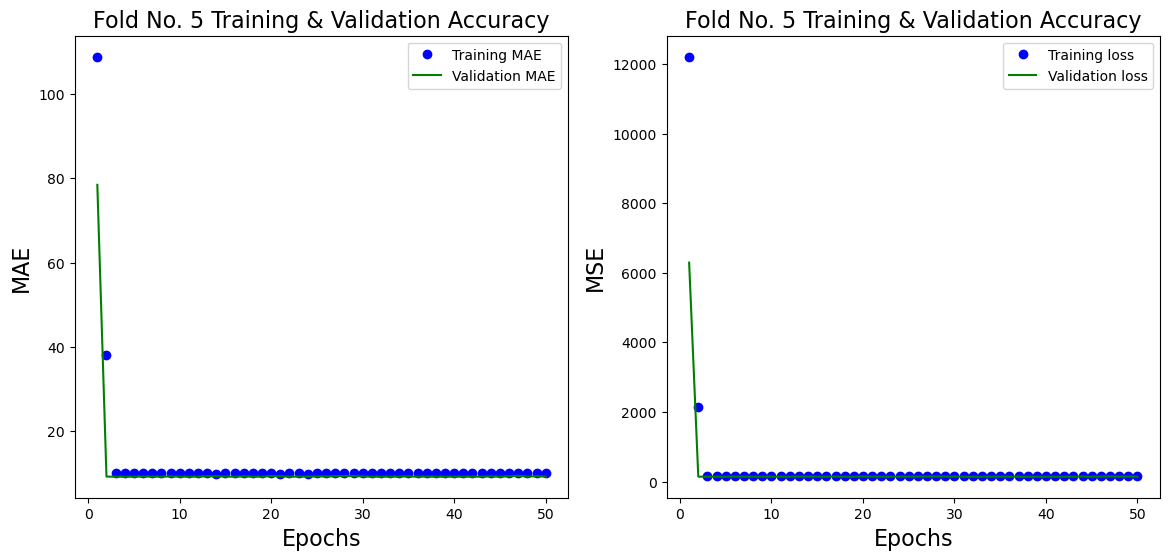

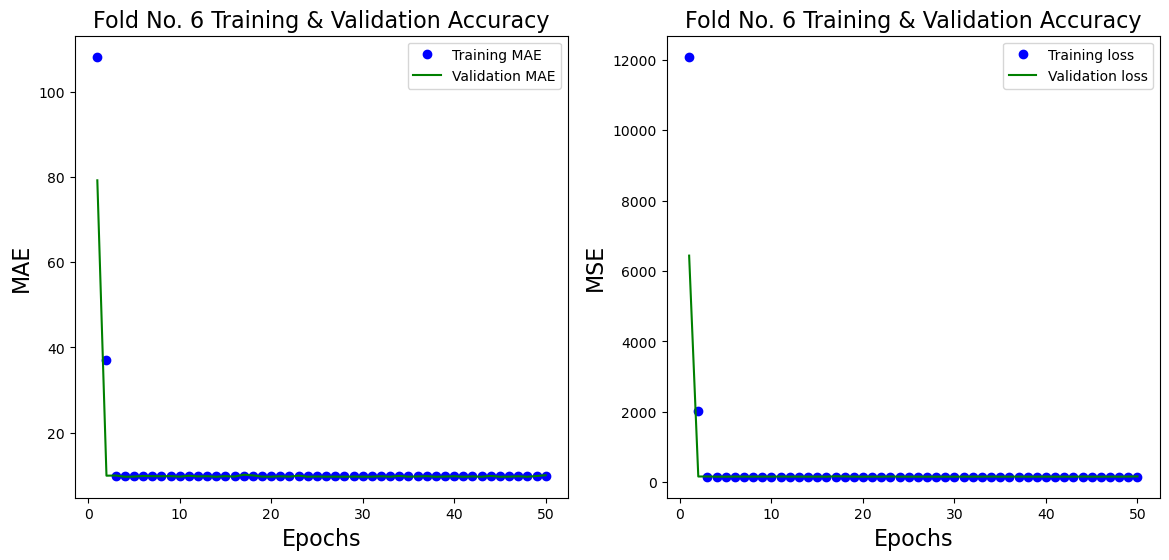

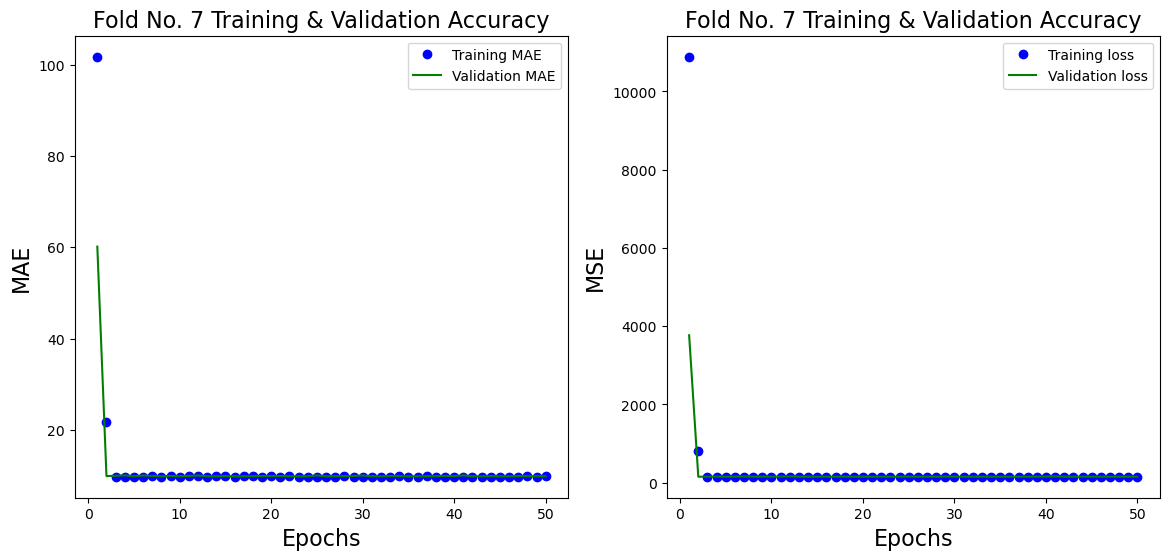

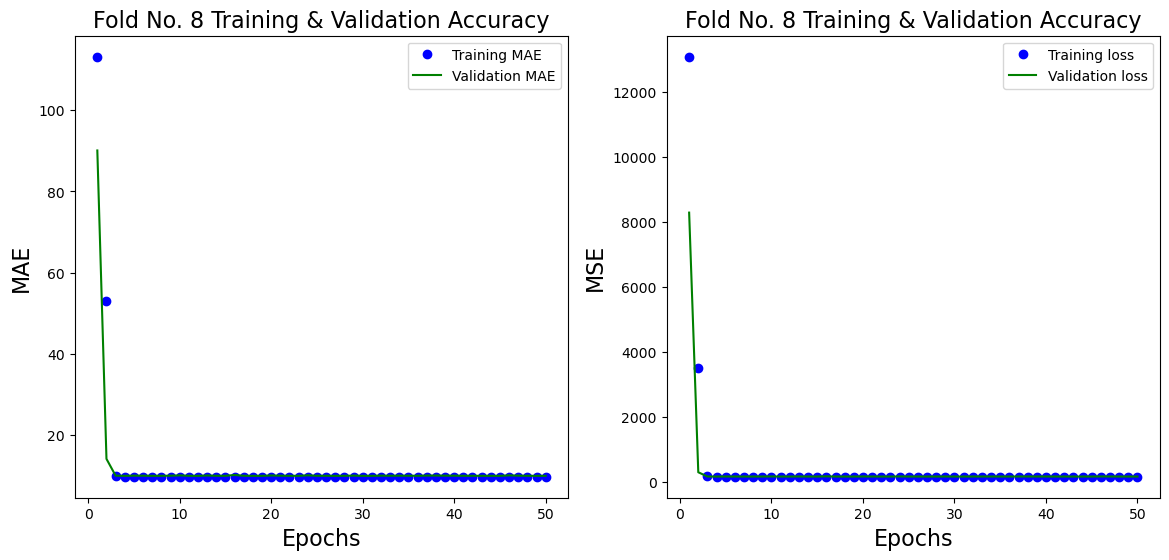

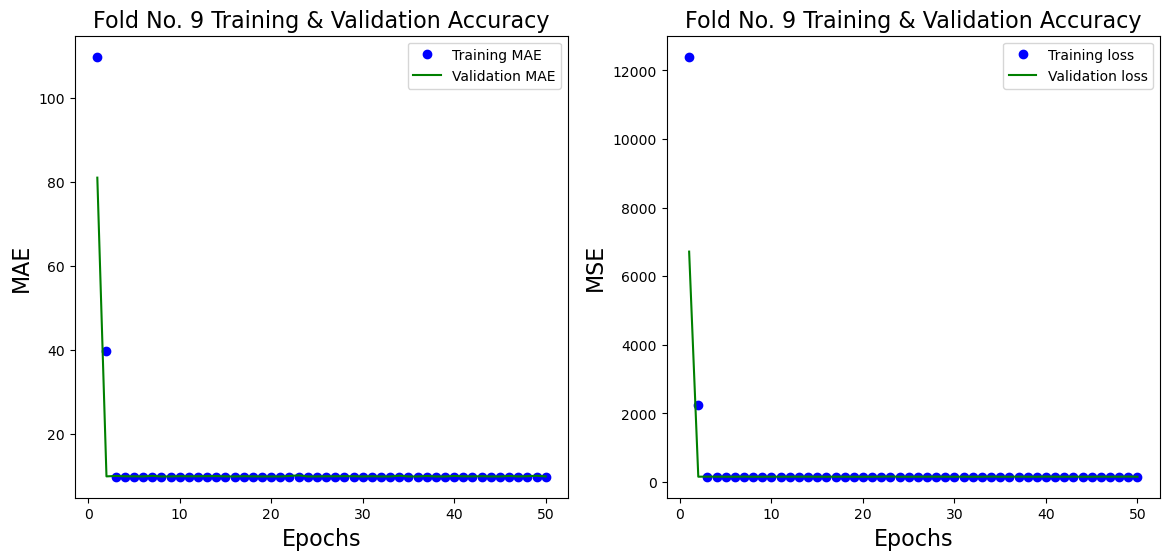

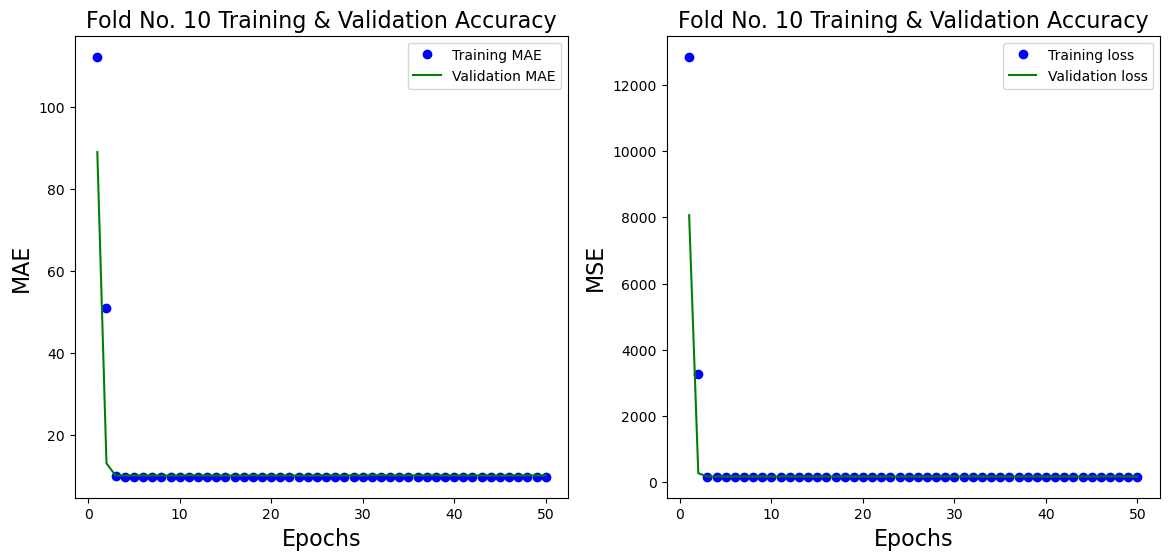

In [21]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the Keras model
    yield_model = Sequential()
    yield_model.add(Dense(10, input_shape=(X.shape[1],), activation='relu'))
    yield_model.add(Dense(20, activation='relu'))
    yield_model.add(Dense(1))

    # Compile model
    yield_model.compile(optimizer=optimizers.RMSprop(learning_rate=0.01),
                loss='mse',
                metrics=['mae'])


    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit the network
    yield_model_history = yield_model.fit(inputs[train], targets[train],
                        validation_data=(inputs[test], targets[test]),
                        epochs=50,
                        batch_size=20)

    # Generate generalization metrics
    yield_scores = yield_model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {yield_model.metrics_names[0]} of {yield_scores[0]}; {yield_model.metrics_names[1]} of {yield_scores[1]}')
    yield_mae_per_fold.append(yield_scores[1])
    yield_loss_per_fold.append(yield_scores[0])
   
    # Performance Curves
    history_dict = yield_model_history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    accuracy = history_dict['mae']
    val_accuracy = history_dict['val_mae']
 
    epochs = range(1, len(loss_values) + 1)
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    #
    # Plot the model accuracy (MAE) vs Epochs
    #
    ax[0].plot(epochs, accuracy, 'bo', label='Training MAE')
    ax[0].plot(epochs, val_accuracy, 'g', label='Validation MAE')
    ax[0].set_title('Fold No. %d Training & Validation Accuracy' % fold_no, fontsize=16)
    ax[0].set_xlabel('Epochs', fontsize=16)
    ax[0].set_ylabel('MAE', fontsize=16)
    ax[0].legend()
    #
    # Plot the loss vs Epochs
    #
    ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
    ax[1].plot(epochs, val_loss_values, 'g', label='Validation loss')
    ax[1].set_title('Fold No. %d Training & Validation Accuracy' % fold_no, fontsize=16)
    ax[1].set_xlabel('Epochs', fontsize=16)
    ax[1].set_ylabel('MSE', fontsize=16)
    ax[1].legend()
    
    # Increase fold number
    fold_no = fold_no + 1

### Average Scores

In [22]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(yield_mae_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {yield_loss_per_fold[i]} - Mean Absolute Error: {yield_mae_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Mean Absolute Error: {np.mean(yield_mae_per_fold)} (+- {np.std(yield_mae_per_fold)})')
print(f'> Loss: {np.mean(yield_loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 135.4361114501953 - Mean Absolute Error: 9.161018371582031
------------------------------------------------------------------------
> Fold 2 - Loss: 169.15419006347656 - Mean Absolute Error: 10.212234497070312
------------------------------------------------------------------------
> Fold 3 - Loss: 164.46548461914062 - Mean Absolute Error: 10.021856307983398
------------------------------------------------------------------------
> Fold 4 - Loss: 175.73403930664062 - Mean Absolute Error: 10.24374771118164
------------------------------------------------------------------------
> Fold 5 - Loss: 138.13369750976562 - Mean Absolute Error: 9.100171089172363
------------------------------------------------------------------------
> Fold 6 - Loss: 164.61721801757812 - Mean Absolute Error: 9.974183082580566
-----------

### Final Training and Save Keras model to Disk

In [23]:
# Define the Keras model
yield_model = Sequential()
yield_model.add(Dense(10, input_shape=(X.shape[1],), activation='relu'))
yield_model.add(Dense(20, activation='relu'))
yield_model.add(Dense(1))

# Compile model
yield_model.compile(optimizer=optimizers.RMSprop(learning_rate=0.01),
                loss='mse',
                metrics=['mae'])


# Fit the network
yield_model_history = yield_model.fit(standardized_data, y,
                        validation_data=(X_test, y_test),
                        epochs=50,
                        batch_size=20)
    
pickle.dump(yield_model, open(r'.\Models\GT_yield_model.pkl', 'wb'))

Epoch 1/50
195/195 [==============================] - 1s 3ms/step - loss: 11503.1934 - mae: 105.1374 - val_loss: 4907.4790 - val_mae: 68.9933
Epoch 2/50
195/195 [==============================] - 0s 1ms/step - loss: 1182.3276 - mae: 26.4337 - val_loss: 148.1557 - val_mae: 9.6440
Epoch 3/50
195/195 [==============================] - 0s 1ms/step - loss: 156.9559 - mae: 9.7993 - val_loss: 153.2394 - val_mae: 9.8168
Epoch 4/50
195/195 [==============================] - 0s 1ms/step - loss: 156.9213 - mae: 9.8035 - val_loss: 149.7913 - val_mae: 9.7024
Epoch 5/50
195/195 [==============================] - 0s 1ms/step - loss: 156.9909 - mae: 9.8100 - val_loss: 147.6628 - val_mae: 9.6102
Epoch 6/50
195/195 [==============================] - 0s 1ms/step - loss: 156.9704 - mae: 9.8094 - val_loss: 147.5543 - val_mae: 9.6085
Epoch 7/50
195/195 [==============================] - 0s 1ms/step - loss: 157.0277 - mae: 9.8273 - val_loss: 147.5332 - val_mae: 9.6184
Epoch 8/50
195/195 [====================